<a href="https://colab.research.google.com/github/andrerubeis/andrerubeis/blob/main/final_project_MML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online Shoppers Intention**

>[Online Shoppers Intention](#scrollTo=ozYGUoW_iPtN)

>>[1. Loading Dataset](#scrollTo=is7kGfcpwPxP)

>>[2. Exploratory Data Analysis](#scrollTo=fOk0epkFwV6f)

>>>[2.1 Categorical Features](#scrollTo=E4d5sBr1wdXX)

>>>[2.2 Numerical Features](#scrollTo=j4FVYo7LwhCW)

>>[3 Data Cleaning](#scrollTo=t2IAZoT-vtXh)

>>[4 Preprocessing](#scrollTo=hI2u8HMWxMhQ)

>>>[4.1 Preprocessing Categorical Features: One-Hot-Encoding](#scrollTo=gQUam5sqx1vN)

>>>[4.2. Preprocessing Numerical Features: Standardization](#scrollTo=Mw9Nr5kPx7xG)

>>[5 Training](#scrollTo=KDXG0q7GyFMA)

>>>[5.1 PCA](#scrollTo=BPJb41TIZkRj)

>>>[5.2 Splitting the dataset in train and test dataset](#scrollTo=C7TgEVxAaMlH)

>>>[5.3 Balancement of the dataset](#scrollTo=0i3tqVPvzDSX)

>>>[5.4 Models Hyperparameters](#scrollTo=OfJEwkyb07oS)

>>[6 Test](#scrollTo=uF64fBHmT7hR)

>>>[6.1 Logistic Regression](#scrollTo=EygtWiKlUBq5)

>>>[Without PCA](#scrollTo=eySLVoAV1kbZ)

>>>>[6.1.1 Results](#scrollTo=r4KzSqEpeI7n)

>>>>[6.1.2 Confusion Matrix](#scrollTo=O-YjwQifeTwY)

>>>>[6.1.3 ROC Curves](#scrollTo=6qM2rgJOcxUE)

>>>[WIth PCA](#scrollTo=jH6w76YJ2-qe)

>>>[6.2 KNN](#scrollTo=QtVHB6XDF-_1)

>>>[Without PCA](#scrollTo=sSglbjKm1vPH)

>>>>[6.2.1 Results](#scrollTo=Q4G-yXAee3A3)

>>>>[6.2.1 Confusion Matrix](#scrollTo=P6k_TzI3fLyC)

>>>>[6.2.2 AUROC](#scrollTo=V2ximHPkgDkV)

>>>[6.3 SVM](#scrollTo=qw9LjuBgHZ1r)

>>>[Without PCA](#scrollTo=0I7iPqkZ1yaV)

>>>>[6.3.1 Results](#scrollTo=IkdrKLiRgK9e)

>>>>[6.3.2 Confusion Matrix](#scrollTo=suK_GXLCgP2c)

>>>>[6.3.3 AUROC](#scrollTo=JRAI6cjqgU1L)

>>>[With PCA](#scrollTo=6py8-LO52Hbd)

>>>[6.4 Random Forest](#scrollTo=jSurDR8UhqCK)

>>>[Without PCA](#scrollTo=2ViI2kme17pH)

>>>>[6.4.1 Results](#scrollTo=GRUUmQhkgeXm)

>>>>[6.4.2 Confusion Matrix](#scrollTo=vfgt_klkgiSG)

>>>>[6.4.3 AUROC](#scrollTo=IWE-h_mUgm3p)

>>>[With PCA](#scrollTo=SCqp3kDi1_am)

>>[7 Plots](#scrollTo=BWlhs7hW7r87)



In [1]:
#%% IMPORTS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.core.display import display
from matplotlib.pyplot import cm
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#Checking if the code is running on GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## **1. Loading Dataset**

In [3]:
#Depending on where the dataset is stored the path may change
path = r'/content/online_shoppers_intention.csv'
df = pd.read_csv(path)
df_copy = df.copy()

## **2. Exploratory Data Analysis**

### 2.1 Categorical Features

In [4]:
### Categorical Features

#%% Categorical Features

categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region',
                        'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

descriptions = ['string indicating month the pageview occurred.',
                'integer value that represents the user’s operating system at the time the page was viewed.',
                'integer value that represents the user’s browser at the time the page was viewed.',
                'region of the user is indicated by an integer value.',
                'category of traffic the user falls under is represented by an integer value.',
                'string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other',
                'boolean value indicating whether or not the session is on a weekend',
                'class label, boolean indicating whether or not the user completed the purchase.']

nans = [df.Month.isna().sum(),
                  df.OperatingSystems.isna().sum(),
                  df.Browser.isna().sum(),
                  df.Region.isna().sum(),
                  df.TrafficType.isna().sum(),
                  df.VisitorType.isna().sum(),
                  df.Weekend.isna().sum(),
                  df.Revenue.isna().sum()]

distinct_values =[df.Month.unique(),
                  df.OperatingSystems.unique(),
                  df.Browser.unique(),
                  df.Region.unique(),
                  df.TrafficType.unique(),
                  df.VisitorType.unique(),
                  df.Weekend.unique(),
                  df.Revenue.unique()]

count_values =  [df.Month.nunique(),
                 df.OperatingSystems.nunique(),
                 df.Browser.nunique(),
                 df.Region.nunique(),
                 df.TrafficType.nunique(),
                 df.VisitorType.nunique(),
                 df.Weekend.nunique(),
                 df.Revenue.nunique()]

df_categorical_features_description = pd.DataFrame()

df_categorical_features_description['Feature Name'] = categorical_features
df_categorical_features_description['Description'] = descriptions
df_categorical_features_description['NaNs'] = nans
df_categorical_features_description['Distinct Values'] = distinct_values
df_categorical_features_description['Distinct Count'] = count_values

df_categorical_features_description = df_categorical_features_description.sort_values('Feature Name')

del descriptions, distinct_values, count_values
df_categorical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_categorical_features_description.style.hide_index())

Feature Name,Description,NaNs,Distinct Values,Distinct Count
Browser,integer value that represents the user’s browser at the time the page was viewed.,0,[ 1 2 3 4 5 6 7 10 8 9 12 13 11],13
Month,string indicating month the pageview occurred.,0,['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'],10
OperatingSystems,integer value that represents the user’s operating system at the time the page was viewed.,0,[1 2 4 3 7 6 8 5],8
Region,region of the user is indicated by an integer value.,0,[1 9 2 3 4 5 6 7 8],9
Revenue,"class label, boolean indicating whether or not the user completed the purchase.",0,[False True],2
TrafficType,category of traffic the user falls under is represented by an integer value.,0,[ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 18 19 16 17 20],20
VisitorType,"string indicating whether a visitor is a New Visitor, a Returning Visitor, or Other",0,['Returning_Visitor' 'New_Visitor' 'Other'],3
Weekend,boolean value indicating whether or not the session is on a weekend,0,[False True],2


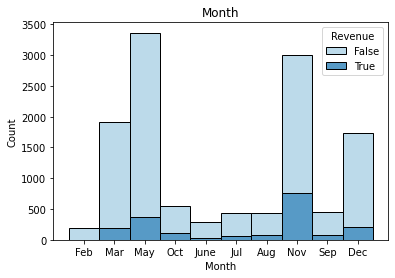

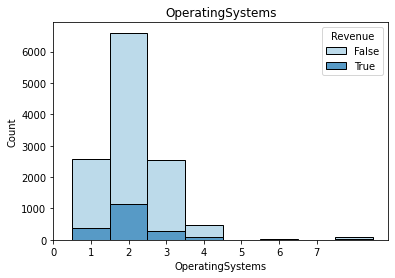

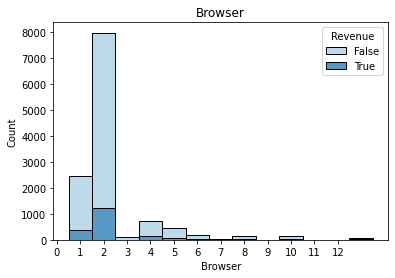

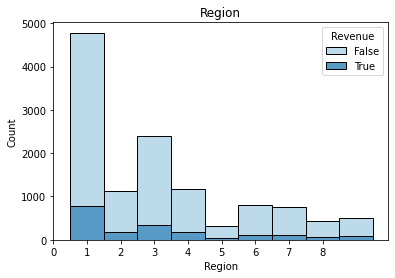

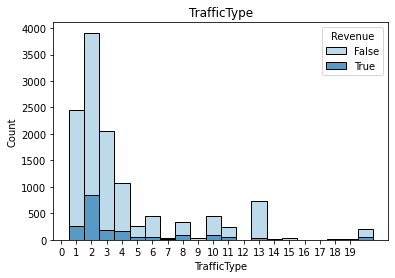

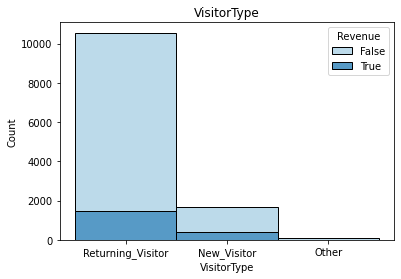

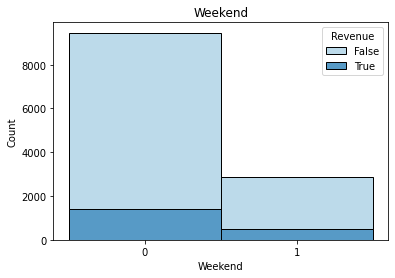

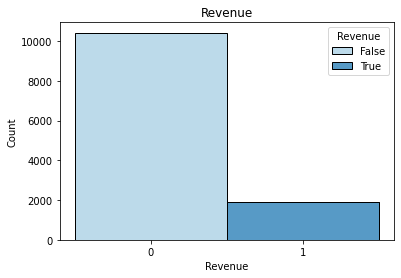

In [5]:
import datetime
import time

sns.color_palette("Paired")
for feature in categorical_features:
    plt.figure()
    n_bins = df[feature].nunique()
    sns.histplot(df, x = feature, hue='Revenue', multiple='stack', bins=n_bins,discrete=True, palette='Paired')
    plt.xticks(range(0,n_bins))
    plt.title(feature)
    plt.show()
    print("")

### 2.2 Numerical Features

In [6]:
#%% Numerical Features

numerical_features = list(set(df.columns)-set(categorical_features))

descriptions = ['average page value over the value of the target page and/or the successful completion of an online purchase',
                'how many product related pages the user accessed',
                '#seconds spent on product related pages.',
                '#seconds spent on administrative pages',
                'how many pages of informational type the user accessed',
                'percentage of website pageviews actually end on that particular page',
                'proportion of users that arrive on that page of the website and leave without performing any further actions',
                'how many pages of administrative type the user accessed.',
                'closeness of the site visiting time to a special day',
                '#seconds spent on informational pages.']
nans = [df.PageValues.isna().sum(),
                  df.ProductRelated.isna().sum(),
                  df.ProductRelated_Duration.isna().sum(),
                  df.Administrative_Duration.isna().sum(),
                  df.Informational.isna().sum(),
                  df.ExitRates.isna().sum(),
                  df.BounceRates.isna().sum(),
                  df.Administrative.isna().sum(),
                  df.SpecialDay.isna().sum(),
                  df.Informational_Duration.isna().sum()]

mins =[df.PageValues.min(),
                  df.ProductRelated.min(),
                  df.ProductRelated_Duration.min(),
                  df.Administrative_Duration.min(),
                  df.Informational.min(),
                  df.ExitRates.min(),
                  df.BounceRates.min(),
                  df.Administrative.min(),
                  df.SpecialDay.min(),
                  df.Informational_Duration.min()]

maxs =[df.PageValues.max(),
                  df.ProductRelated.max(),
                  df.ProductRelated_Duration.max(),
                  df.Administrative_Duration.max(),
                  df.Informational.max(),
                  df.ExitRates.max(),
                  df.BounceRates.max(),
                  df.Administrative.max(),
                  df.SpecialDay.max(),
                  df.Informational_Duration.max()]

means =[df.PageValues.mean(),
                  df.ProductRelated.mean(),
                  df.ProductRelated_Duration.mean(),
                  df.Administrative_Duration.mean(),
                  df.Informational.mean(),
                  df.ExitRates.mean(),
                  df.BounceRates.mean(),
                  df.Administrative.mean(),
                  df.SpecialDay.mean(),
                  df.Informational_Duration.mean()]

stds =[df.PageValues.std(),
                  df.ProductRelated.std(),
                  df.ProductRelated_Duration.std(),
                  df.Administrative_Duration.std(),
                  df.Informational.std(),
                  df.ExitRates.std(),
                  df.BounceRates.std(),
                  df.Administrative.std(),
                  df.SpecialDay.std(),
                  df.Informational_Duration.std()]

count_values =  [df.PageValues.nunique(),
                  df.ProductRelated.nunique(),
                  df.ProductRelated_Duration.nunique(),
                  df.Administrative_Duration.nunique(),
                  df.Informational.nunique(),
                  df.ExitRates.nunique(),
                  df.BounceRates.nunique(),
                  df.Administrative.nunique(),
                  df.SpecialDay.nunique(),
                  df.Informational_Duration.nunique()]

df_numerical_features_description = pd.DataFrame()

df_numerical_features_description['Feature Name'] = numerical_features
df_numerical_features_description['Description'] = descriptions
df_numerical_features_description['NaNs'] = nans
df_numerical_features_description['Min'] = mins
df_numerical_features_description['Max'] = maxs
df_numerical_features_description['Mean'] = means
df_numerical_features_description['Std'] = stds
df_numerical_features_description['Distinct Count'] = count_values

df_numerical_features_description=df_numerical_features_description.sort_values('Feature Name')
df_numerical_features_description.style.set_properties(**{'text-align': 'left'})
display(df_numerical_features_description.style.hide_index())
#print(df_numerical_features_description.to_string(index=False))

Feature Name,Description,NaNs,Min,Max,Mean,Std,Distinct Count
Administrative,percentage of website pageviews actually end on that particular page,0,0.000000,0.200000,0.043073,0.048597,4777
Administrative_Duration,how many pages of informational type the user accessed,0,0.000000,24.000000,0.503569,1.270156,17
BounceRates,proportion of users that arrive on that page of the website and leave without performing any further actions,0,0.000000,0.200000,0.022191,0.048488,1872
ExitRates,#seconds spent on administrative pages,0,0.000000,3398.750000,80.818611,176.779107,3335
Informational,#seconds spent on informational pages.,0,0.000000,2549.375000,34.472398,140.749294,1258
Informational_Duration,closeness of the site visiting time to a special day,0,0.000000,1.000000,0.061427,0.198917,6
PageValues,how many pages of administrative type the user accessed.,0,0.000000,27.000000,2.315166,3.321784,27
ProductRelated,average page value over the value of the target page and/or the successful completion of an online purchase,0,0.000000,361.763742,5.889258,18.568437,2704
ProductRelated_Duration,how many product related pages the user accessed,0,0.000000,705.000000,31.731468,44.475503,311
SpecialDay,#seconds spent on product related pages.,0,0.000000,63973.522230,1194.746220,1913.669288,9551


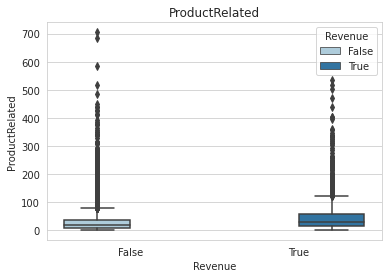

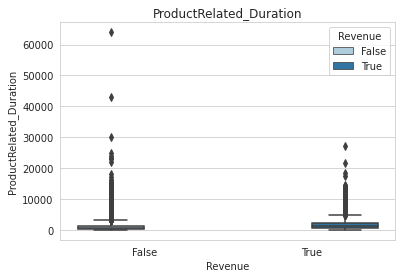

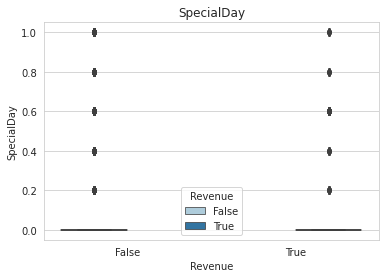

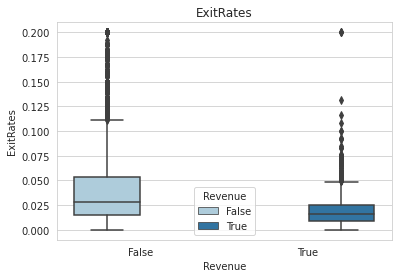

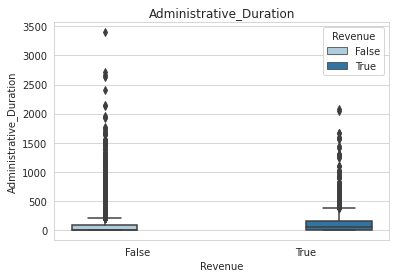

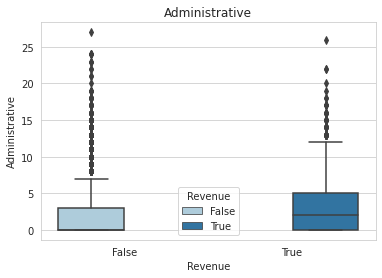

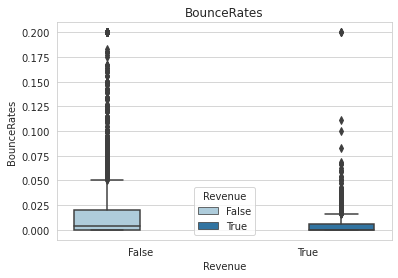

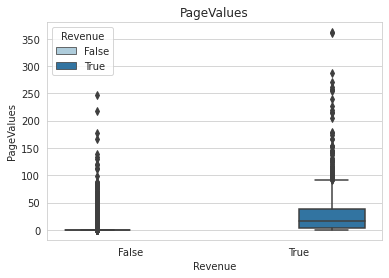

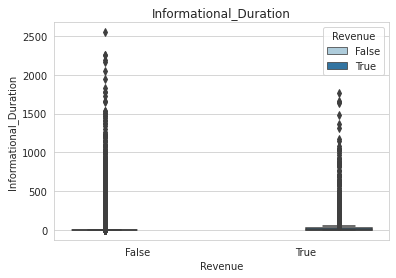

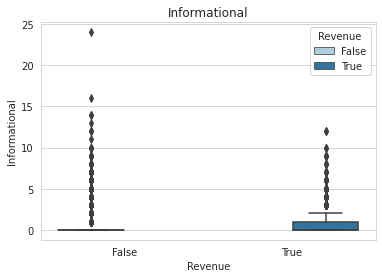

In [7]:
# BOXPLOTS
sns.set_style("whitegrid")
for feature in numerical_features: #-1 perchè così feature non assume 'Revenue'
    plt.figure()
    sns.boxplot(x= 'Revenue', y = feature, hue='Revenue', data = df,palette='Paired')
    plt.title(feature)
    plt.legend(title='Revenue')
    plt.show()
    print("")


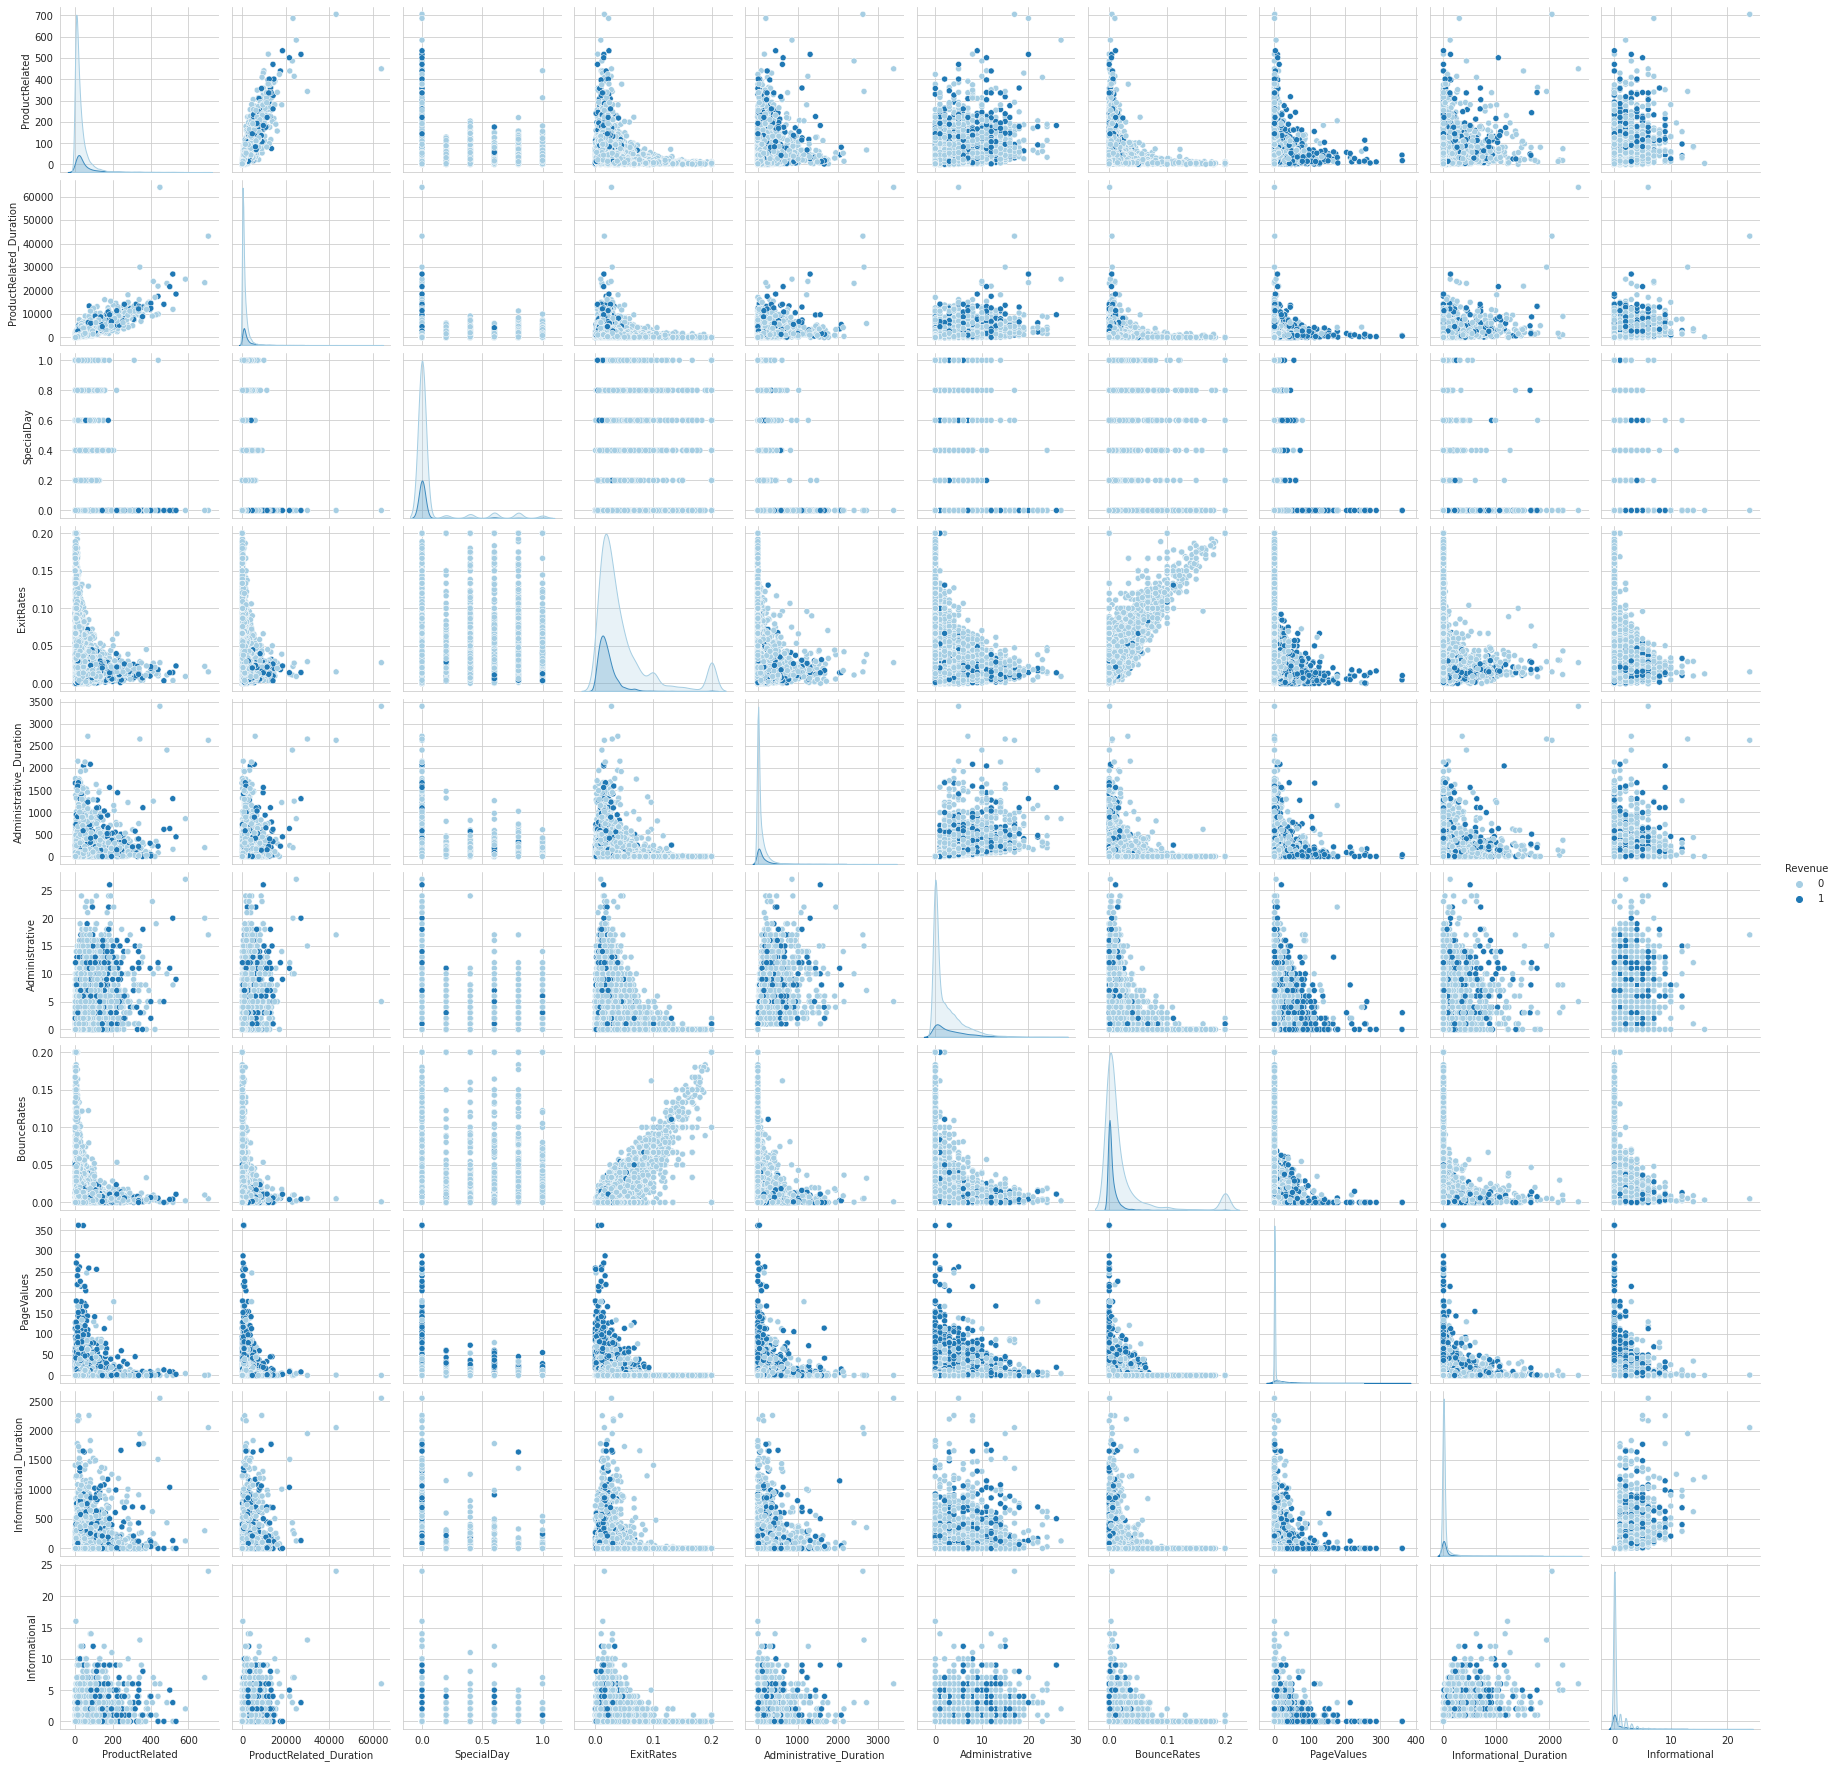

In [8]:
# CORRELATION
numerical_features = list(set(df.columns)-set(categorical_features))
numerical_features.append('Revenue') #aggiungo 'Revenue' in numerical features solo per fare la correlation matrix
df_numerical = df[numerical_features]
df_numerical.Revenue = df_numerical.Revenue.astype(int)
sns.pairplot(df_numerical, hue='Revenue', palette = 'Paired')

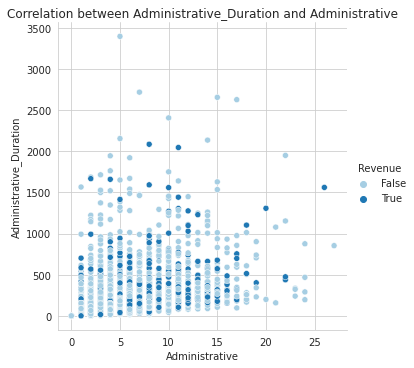

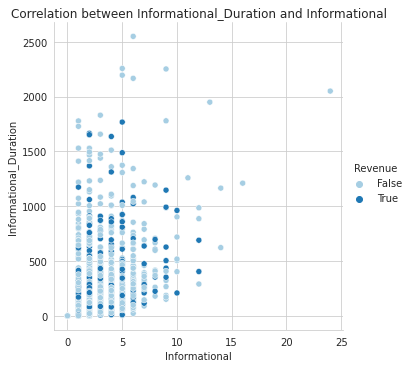

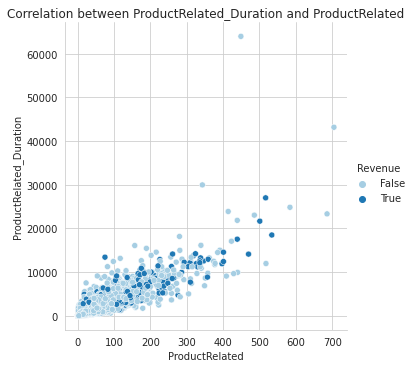

In [9]:
# SOME SCATTER PLOTS

sns.relplot(x = 'Administrative', y = 'Administrative_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between Administrative_Duration and Administrative")
plt.show()
print("")

sns.relplot(x = 'Informational', y = 'Informational_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between Informational_Duration and Informational")
plt.show()
print("")

sns.relplot(x = 'ProductRelated', y = 'ProductRelated_Duration', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between ProductRelated_Duration and ProductRelated")
plt.show()
print("")

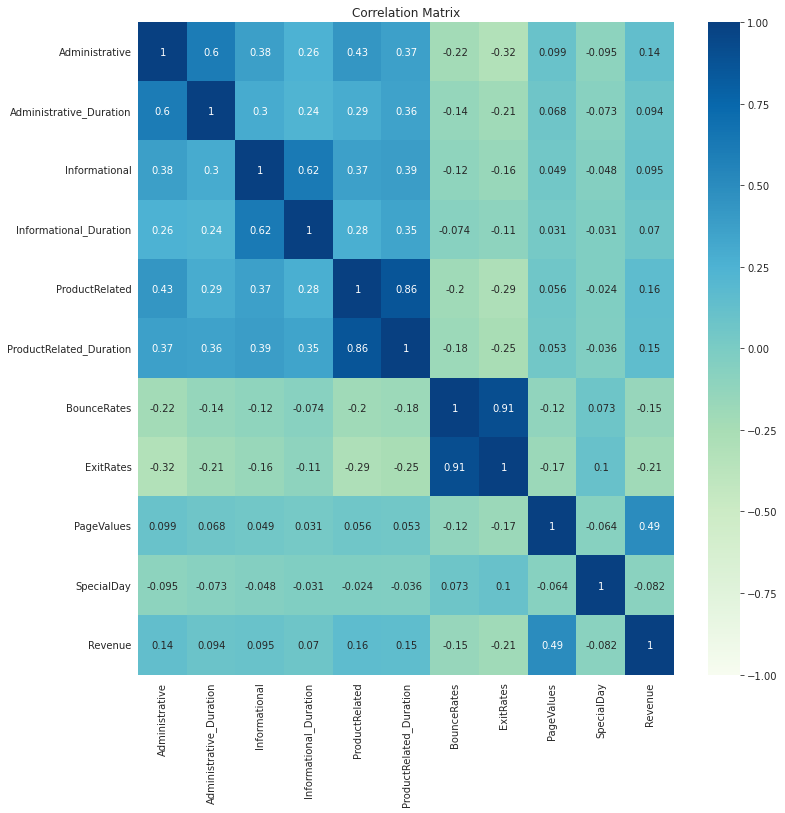

In [10]:
#%% CORRELATION MATRIX

numerical_df = df.drop(categorical_features[:-1], axis=1) #numerical df contiene tutte le numerical features più revenue
matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix, annot=True, ax=ax, vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu')
plt.title("Correlation Matrix")
plt.show()

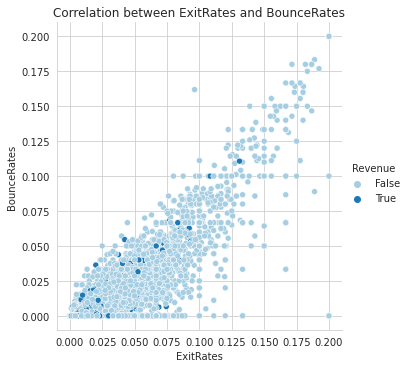

In [11]:
sns.relplot(x = 'ExitRates', y = 'BounceRates', hue='Revenue', data=df, palette = 'Paired')
plt.title("Correlation between ExitRates and BounceRates")
plt.show()

## **3 Data Cleaning**

In [12]:
#Checking NaN values
print("Dataset information")
df.info()
print("")

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tr

In [13]:
#Convert bool type variables in integer type variables and properly write Months
df = df_copy.copy()
df.Weekend = df.Weekend.astype(int)
df.Revenue = df.Revenue.astype(int)
df['Month'].replace('June', 'Jun', inplace=True)
df.Month = sorted(df.Month, key=lambda x: pd.to_datetime(x, format="%b"))

In [14]:
#Dropping correlated features seen in correlation matrix
features_dropped = ['BounceRates','Administrative_Duration', 'Informational_Duration','ProductRelated_Duration']
df = df.drop(columns=features_dropped, axis = 1)

## **4 Preprocessing**

Classifiers should be applied on numerical dataframes, so we need to first convert categorical features in numerical ones by applying the one-hot encoding technique. Then we procede with the standardization of the numerical features.

### 4.1 Preprocessing Categorical Features: One-Hot-Encoding

In [15]:
numerical_features = list(set(numerical_features)-set(features_dropped))
#numerical_features.remove('Revenue')
# One hot encoding
dummy_columns = ['OperatingSystems','Browser','Region','TrafficType','VisitorType', 'Weekend']

for column in categorical_features[1:-1]: #non considero Month nel ciclo perchè lo gestico a parte (1) e mi fermo prima di considerare Revenue (-1)
    df_dummies = pd.get_dummies(df[column], drop_first = True, prefix = column)
    df = pd.concat([df, df_dummies], axis = 1)



# (NOT) Accounting for all months in the calendar except Jan and Apr not present (modifica poi per vedere che cambia se consideri tutti)
months = ['Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for mx in months[1:]:    # drop_first = True
    df['Month_'+mx] = (df['Month'] == mx).astype('int64')

df = df.drop(columns = categorical_features[:-1]) #droppo tutte le categorical features tranne Revenue
df

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Revenue,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,...,Weekend_1,Month_Mar,Month_May,Month_Jun,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec
0,0,0,1,0.200000,0.000000,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0.100000,0.000000,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.200000,0.000000,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0.140000,0.000000,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,10,0.050000,0.000000,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0,53,0.029031,12.241717,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
12326,0,0,5,0.021333,0.000000,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
12327,0,0,6,0.086667,0.000000,0.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
12328,4,0,15,0.021053,0.000000,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### 4.2. Preprocessing Numerical Features: Standardization

In [16]:
#Preparing for standardization

y = df.Revenue.copy()
numerical_features.remove('Revenue')
numerical_features

['ProductRelated',
 'SpecialDay',
 'ExitRates',
 'Administrative',
 'PageValues',
 'Informational']

In [17]:
import sklearn
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()#

# scaled_df  = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
# scaled_df2 = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
numerical_df = numerical_df[numerical_features]

scaled_numerical_df =  pd.DataFrame(ss.fit_transform(numerical_df), columns=numerical_df.columns)

categorical_features = list(set(df.columns)-set(numerical_features))
scaled_df = pd.concat([df[categorical_features], scaled_numerical_df], axis=1)

y = scaled_df['Revenue'].copy()
X = scaled_df.drop('Revenue',axis=1)

#Replace 0 values in categorical features with -1 to have mean = 0
scaled_df[categorical_features] = scaled_df[categorical_features].mask(scaled_df[categorical_features] == 0, -1)
scaled_df
# features_to_add = [e for e in numerical_features if e not in features_dropped]
# scaled_df_categorical = df.drop(columns=features_to_add, axis=1)
# scaled_df = pd.concat([scaled_numerical_df, scaled_df_categorical], axis = 1)

,Region_9,TrafficType_7,OperatingSystems_3,Month_Jun,TrafficType_13,TrafficType_14,Browser_10,TrafficType_11,Region_6,OperatingSystems_8,...,Browser_2,Browser_5,TrafficType_10,Month_May,ProductRelated,SpecialDay,ExitRates,Administrative,PageValues,Informational
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-0.691003,-0.308821,3.229316,-0.696993,-0.317178,-0.396478
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-0.668518,-0.308821,1.171473,-0.696993,-0.317178,-0.396478
2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-0.691003,-0.308821,3.229316,-0.696993,-0.317178,-0.396478
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-0.668518,-0.308821,1.994610,-0.696993,-0.317178,-0.396478
4,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-0.488636,-0.308821,0.142551,-0.696993,-0.317178,-0.396478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,0.478227,-0.308821,-0.288966,0.206173,0.342125,-0.396478
12326,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-0.601062,-0.308821,-0.447364,-0.696993,-0.317178,-0.396478
12327,-1,-1,1,-1,1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-0.578577,-0.308821,0.897093,-0.696993,-0.317178,-0.396478
12328,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-0.376210,-0.308821,-0.453140,0.507228,-0.317178,-0.396478


## **5 Training**

### 5.1 PCA

0.904108916636941 expressed by 25 components


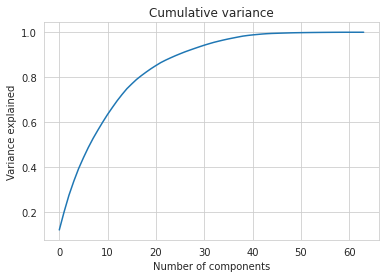

In [18]:
#%% PCA
from sklearn.decomposition import PCA
PCA_df = PCA().fit(scaled_df.drop('Revenue',axis=1))
pca_df = PCA_df.transform( scaled_df.drop('Revenue',axis=1))

cumvar = np.cumsum(PCA_df.explained_variance_ratio_)

n_comp =  np.argmax(cumvar > .9)

#Plotting cumulative variance
plt.plot(cumvar)
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
print(f"{cumvar[n_comp]} expressed by {n_comp} components")

In [19]:
# construct new dataset with 90% of variance explained.
X_pca = np.dot(scaled_df.drop('Revenue',axis=1), PCA_df.components_[:n_comp,:].T)
X_pca = pd.DataFrame(X_pca, columns=["PC%d" % (x + 1) for x in range(n_comp)])
X_pca.shape

(12330, 25)

### 5.2 Splitting the dataset in train and test dataset

In [20]:
from sklearn.model_selection import train_test_split

seed = 13

# Not PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.2, random_state=seed, stratify = y)

#PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=seed, stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train_pca, X_test_pca, y_train_pca, y_test_pca

((9864, 25),
 (2466, 25),
 (9864,),
 (2466,),
        Region_9  TrafficType_7  OperatingSystems_3  Month_Jun  TrafficType_13  \
 3388          0              0                   1          0               0   
 3188          0              0                   0          0               0   
 1889          0              0                   0          0               0   
 10528         0              0                   0          0               0   
 7155          0              0                   0          0               0   
 ...         ...            ...                 ...        ...             ...   
 1257          0              0                   0          0               0   
 249           0              0                   1          0               0   
 3954          0              0                   0          0               0   
 7986          0              0                   0          0               1   
 11142         0              0                   0 

### 5.3 Balancement of the dataset 

* **Undersampling**: NearMiss
* **Oversampling**: SMOTE
* **Oversampling-Undersampling**: SMOTETomekLinks techniques.

In [21]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import NearMiss 
from imblearn.combine import SMOTETomek 

In [22]:
# function to plot histograms of balanced classes
from collections import Counter

def plot_balance_df (X_train, y_train, sampling):
  balanced_df = pd.concat([X_train, y_train], axis=1)
  balanced_df=balanced_df.rename(columns={0: 'Revenue'})

 
  # plt.figure()
  # counter = Counter(y_train)
  # print(counter)
  # # scatter plot of examples by class label
  # for label, _ in counter.items():
  #   row_ix = np.where(y_train == label)[0]
  #   plt.scatter(balanced_df[row_ix, 0], balanced_df[row_ix, 1], label=str(label))
  # plt.legend()
  # plt.show()

  plt.figure()
  n_bins = balanced_df['Revenue'].nunique()
  sns.histplot(balanced_df, x = 'Revenue', hue='Revenue', multiple='stack', bins=n_bins,discrete=True, palette='Paired')
  plt.title('Class balance ('+ sampling+')')
  plt.show()

In [23]:
# Retrieve the training and test dataset for undersampling, oversampling and both
sm = SMOTE(random_state = seed)
undersample = NearMiss(version=1, n_neighbors=3)
smt = SMOTETomek(random_state=seed)
                 
X_train_smote_tomek, y_train_smote_tomek = smt.fit_resample(X_train, y_train)
X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

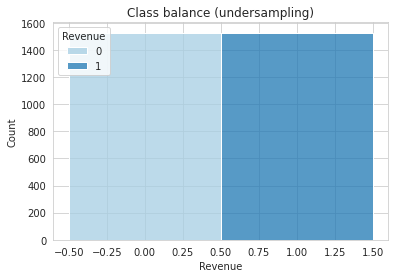

In [24]:
sampling = 'undersampling'
plot_balance_df(X_train_nearmiss, y_train_nearmiss, sampling)

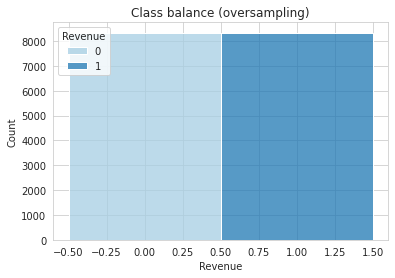

In [25]:
sampling = 'oversampling'
plot_balance_df(X_train_smote, y_train_smote, sampling)

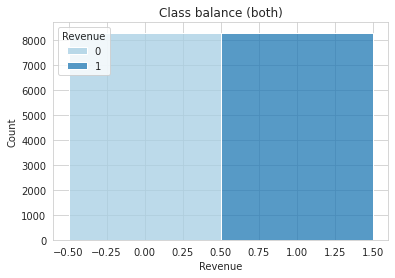

In [26]:
sampling = 'both'
plot_balance_df(X_train_smote_tomek, y_train_smote_tomek, sampling)

### 5.4 Models Hyperparameters
Run the following cell only if models dictionary has not been saved, otherwise load the corresponding pickle file to avoid to retrain every model.

In [27]:
import pickle

path_no_PCA = r'/content/results_without_PCA.pkl'
with open(path_no_PCA, 'rb') as f:
    models = pickle.load(f)

path_PCA = r'/content/results_with_PCA.pkl'
with open(path_PCA, 'rb') as f:
    models_PCA = pickle.load(f)

In [28]:
# # PREPARING DATA STRUCTURE WHERE TO STORE THE RESULTS OF MODELS
# models = {}
# models = {'LR': LogisticRegression(),
#           'KNN': KNeighborsClassifier(),
#           'SVM': SVC(),
#           'RF': RandomForestClassifier()}

# models_names = ['LR', 'KNN', 'SVM', 'RF']
# hyperparams = {}

# # define logistic regression grid search params
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalties = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]

# # # define grid search KNN
# n_neighbors = range(1, 10)
# weights = ['uniform', 'distance']
# metrics = ['euclidean', 'manhattan', 'minkowski']

# # define SVM params
# kernels = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gammas = ['scale']

# # # define grid search RF
# n_estimators = [10, 100, 1000]
# max_features = ['sqrt', 'log2']

# datasets = ['original', 'undersampling', 'oversampling', 'both']

# for dataset in datasets:
#   models[dataset] = {}
#   for name in models_names:
#     models[dataset][name] = {}

#     #LOGISTIC REGRESSION
#     if name == 'LR':
#       #models[dataset][name]['model'] = LogisticRegression()

#       for solver in solvers:
#         models[dataset][name][solver] = {}

#         for penalty in penalties:
#           models[dataset][name][solver][penalty] = {}

#           for c in c_values:
#             models[dataset][name][solver][penalty][c] = {}


#     elif name == 'KNN':
      
#       #models[dataset][name]['model'] = KNeighborsClassifier()

#       for neighbor in n_neighbors:
#         models[dataset][name][neighbor] = {}

#         for w in weights:
#           models[dataset][name][neighbor][w] = {}

#           for metric in metrics:
#             models[dataset][name][neighbor][w][metric] = {}


#     elif name == 'SVM':

#       #models[dataset][name]['model'] = SVC()

#       for kernel in kernels:
#           models[dataset][name][kernel] = {}

#           for gamma in gammas:
#             models[dataset][name][kernel][gamma] = {}
            
#             for c in C:
#               models[dataset][name][kernel][gamma][c]  ={}
  
#     else:
#       #models[name] = {'model': RandomForestClassifier()}

#       for estimator in n_estimators:
#         models[dataset][name][estimator] = {}

#         for feature in max_features:
#           models[dataset][name][estimator][feature] = {}                    

In [29]:
def return_train_val_datasets(idx_start_val, idx_stop_val, X_train, y_train, exit = False):
# """
# Inputs: 

# - idx_start_val: index of the first element of the current validation dataset
# - idx_stop_val: index of the last element of the current validation dataset
# - X_train: 80% of original dataset (without class label Revenue)
# - y_train: 80% of original class label 'Revenue'

# Returns:

# - X_train_train: the training dataset at iteration i (9/10 of X_train)
# - X_val_train: the validation dataset at iteration i (1/10 of X_train)
# - y_train_train: the training class label at iteration i (9/10 of y_train)
# - y_val_train: the validation class label at iteration i (1/10 of y_train)
# """  
  # idx_start_val = 0
  # idx_stop_val = n_samples_val-1
  # i=0
  # exit = False
  # print(solver + " " + penalty + " " + str(c))
  # for i, idx in enumerate(range(0, n_samples_training-1, n_samples_val-1)): #iter over indexes

      #Quando arrivo alla fine del training dataset può succedere che 
      #l'ultimo fold non sia multiplo di n_samples_val, perciò faccio un 
      #controllo e allungo il validation dataset fino alla fine del 
      #training dataset
  # if X_train.iloc[idx_stop_val:n_samples_training-1].shape[0] < n_samples_val:
  #     idx_stop_val = n_samples_training
  #     #idx_start_val = idx_stop_val - n_samples_val
  #     exit = True
  #     #return X_train_train, X_val_train, y_train_train, y_val_train
  
  #if exit == False:
  X_val_train = X_train.iloc[idx_start_val:idx_stop_val]
  y_val_train = y_train.iloc[idx_start_val:idx_stop_val]

  #print(X_val_train.shape)
  X_train_train_sx = X_train.iloc[0:idx_start_val]
  X_train_train_dx = X_train.iloc[idx_stop_val: n_samples_training-1]
  print(X_train_train_sx.shape, X_train_train_dx.shape, idx_start_val, idx_stop_val)
  y_train_train_sx = y_train.iloc[0:idx_start_val]
  y_train_train_dx = y_train.iloc[idx_stop_val: n_samples_training-1]


  #Concat the training dataframe at the left of validation dataset with the one on the right
  #to obtain a unique training dataset to use to fit the classifier
  X_train_train = pd.concat([X_train_train_sx, X_train_train_dx], axis=0)
  y_train_train = pd.concat([y_train_train_sx, y_train_train_dx], axis=0)

  return X_train_train, X_val_train, y_train_train, y_val_train

In [30]:
#function to retrieve params to evaluate during grid search
from ssl import SSLCertVerificationError
def retrieve_params_model(model_name):
  
  if model_name == 'LR':
    # define logistic regression grid search params
    param1 = ['newton-cg', 'lbfgs', 'liblinear']      #solvers
    param2 = ['l2']                                   #penalty
    param3 = [100, 10, 1.0, 0.1, 0.01]                #C
    model = LogisticRegression()

  elif model_name == 'KNN':
    # # define grid search KNN
    param1 = range(1, 10)                             #n_neighbors
    param2 = ['uniform', 'distance']                  #weights
    param3 = ['euclidean', 'manhattan', 'minkowski']  #metrics
    model = KNeighborsClassifier()

  elif model_name == 'SVM':
    # define SVM params
    param1 = ['poly', 'rbf', 'sigmoid']               #krnels
    param3 =  [50, 10, 1.0, 0.1, 0.01]                #gamma
    param2 = ['scale']                                #C

    model = SVC()

  else: #RF
    param1 = [10, 100, 1000]                          #n_estimators
    param2 = ['sqrt', 'log2']                         #max_features
    param3 = '-'
    model = RandomForestClassifier()


  return param1, param2, param3, model

In [31]:
def train_validate_model(models, model_name, X_train, y_train, smote =True, nearmiss = False):

  #Retrieve all the hyperparams we want to test of the current model
  params1, params2, params3, model = retrieve_params_model(model_name)

  #Decide which scenario we want to implement
  if smote == False and nearmiss == False:
    dataset = 'original'
  elif smote == True and nearmiss == False:
    dataset = 'oversampling'
  elif smote == False and nearmiss == True:
    dataset = 'undersampling'
  else:
    dataset = 'both'

  
  weighted_performances = {'Accuracy': 0,
                           'Precision': 0,
                           'Recall': 0,
                           'Best F1-score': 0}
  performances = {'Accuracy': 0,
                  'Precision': 0,
                  'Recall': 0,
                  'Best F1-score': 0}
  best_f1 = 0          #to pick the best model I evaluate f1-score

  #Grid Search
  for param1 in params1:
    for param2 in params2:
      for param3 in params3:
            
          #Setting model parameters
          if model_name == 'LR':
            model = LogisticRegression(solver=param1, penalty = param2, C= param3)
          
          elif model_name == 'KNN':
            model = KNeighborsClassifier(n_neighbors=param1, weights = param2, metric = param3)

          elif model_name == 'SVM':
            model = SVC(kernel=param1, gamma=param2, C=param3)
          
          else:
            model = RandomForestClassifier(n_estimators=param1, max_features=param2)
          
          print(model_name, param1, param2, param3)

          #K-Cross Validation
          idx_start_val = 0
          idx_stop_val = n_samples_val-1
          i=0
          exit = False

          sum_acc = 0
          sum_prec = 0
          sum_rec = 0
          sum_f1 = 0

          performances['Best F1-score'] = 0
          performances['Accuracy'] = 0
          performances['Precision'] = 0
          performances['Recall'] = 0

          weighted_performances['Best F1-score'] = 0
          weighted_performances['Accuracy'] = 0
          weighted_performances['Precision'] = 0
          weighted_performances['Recall'] = 0
         
          for i in range(n_splits): #10 total iterations for each combination of hyperparams
            print(i)

            #Checking if the last fold is a multiple of n_samples_val, if not we set the last element of the validation dataset to 
            #the last element of X_train so the last validation dataset will be a bit longer (990) than the nine seen before (986)
            if X_train.iloc[idx_stop_val:n_samples_training-1].shape[0] < n_samples_val or idx_start_val > idx_stop_val:
              idx_stop_val = n_samples_training-1
              #break
            if idx_start_val < idx_stop_val:
              X_train_train, X_val_train, y_train_train, y_val_train = return_train_val_datasets(idx_start_val, idx_stop_val, X_train, y_train)
            else:
              break
            
            idx_start_val = idx_stop_val+1
            idx_stop_val = idx_stop_val + n_samples_val
            
            #Before training the classifiers we should apply resampling techniques
            # ONLY to training datasets and leave as it is the validation dataset.

            #Oversampling and Undersampling scenario
            if smote == True and nearmiss == True:
              X_train_smote_tomek, y_train_smote_tomek = smt.fit_resample(X_train_train, y_train_train)
              model = model.fit(X_train_smote_tomek, y_train_smote_tomek)
            
            #Undersampling scenario
            elif smote == False and nearmiss == True:
              X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train_train, y_train_train)
              model = model.fit(X_train_nearmiss, y_train_nearmiss)
            
            #Oversampling scenario
            elif smote == True and nearmiss == False:
              X_train_smote, y_train_smote = sm.fit_resample(X_train_train, y_train_train)
              model = model.fit(X_train_smote, y_train_smote)
            
            #Original scenario
            else:
              print("original")
              model = model.fit(X_train_train, y_train_train)
              
            #Validation on current fold
            y_pred_val = model.predict(X_val_train)

            #Print the results and store the results obtained
            cr = classification_report(y_pred_val, y_val_train, output_dict=True)
            print(cr)
            print("")

            if model_name == 'RF':
              models[dataset][model_name][param1][param2]= cr
            else:
              models[dataset][model_name][param1][param2][param3] =cr

            performances['Best F1-score'] = performances['Best F1-score'] + cr['macro avg']['f1-score']
            performances['Accuracy'] = performances['Accuracy'] + cr['accuracy']
            performances['Precision'] = performances['Precision'] + cr['macro avg']['precision']
            performances['Recall'] = performances['Recall'] + cr['macro avg']['recall']

            weighted_performances['Best F1-score'] = weighted_performances['Best F1-score'] + cr['weighted avg']['f1-score']
            weighted_performances['Accuracy'] = weighted_performances['Accuracy'] + cr['accuracy']
            weighted_performances['Precision'] = weighted_performances['Precision'] + cr['weighted avg']['precision']
            weighted_performances['Recall'] = weighted_performances['Recall'] + cr['weighted avg']['recall']

            sum_f1 = sum_f1 + cr['weighted avg']['f1-score']
            sum_prec = sum_prec + cr['weighted avg']['precision']
            sum_rec = sum_rec + cr['weighted avg']['recall']
            sum_acc = sum_acc + cr['accuracy']
          
          #Compute the mean of the results after the 10 iterations of a specific
          #combination of hyperparameters are completed and see if outperforms the
          #results reached for a different combination seen before.
          mean_f1 = sum_f1/n_splits
          mean_prec = sum_prec/n_splits
          mean_rec = sum_rec/n_splits
          mean_acc = sum_acc/n_splits

          weighted_performances['Best F1-score'] = weighted_performances['Best F1-score']/n_splits
          weighted_performances['Accuracy'] = weighted_performances['Accuracy']/n_splits
          weighted_performances['Precision'] = weighted_performances['Precision']/n_splits
          weighted_performances['Recall'] = weighted_performances['Recall']/n_splits

          performances['Best F1-score'] = performances['Best F1-score']/n_splits
          performances['Accuracy'] = performances['Accuracy']/n_splits
          performances['Precision'] = performances['Precision']/n_splits
          performances['Recall'] = performances['Recall']/n_splits

          #Store best weighted f1-score and the current hyperparams 
          if( mean_f1 > best_f1):
            best_f1 = mean_f1
            print(f"Best f1-score: {best_f1:.3f} - [{param1}, {param2}, {param3}]")



            if model_name == 'RF':
              models[dataset][model_name]['bestParamsF1'] = [best_f1, mean_acc, mean_prec, mean_rec, param1, param2]
              models[dataset][model_name]['WeightedBestParamsF1'] = weighted_performances
              models[dataset][model_name]['NormalBestParamsF1'] = performances
            else:
              models[dataset][model_name]['bestParamsF1'] = [best_f1, mean_acc, mean_prec, mean_rec, param1, param2, param3]
              models[dataset][model_name]['WeightedBestParamsF1'] = weighted_performances
              models[dataset][model_name]['NormalBestParamsF1'] = performances

  return models

In [32]:
#%% INITIALIZATION OF PARAMETERS FOR CROSS VALIDATION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

from sklearn.metrics import classification_report


#Take X_train and split it in n_splits folds to perform cross validation
#one of them is used to validate and the others to train the models
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import NearMiss 
from imblearn.combine import SMOTETomek 

#fig, ax = plt.subplots()
# cmap_data = plt.cm.Paired
# cmap_cv = plt.cm.coolwarm

n_splits = 10

sm = SMOTE(random_state = seed)
undersample = NearMiss(version=1, n_neighbors=3)
smt = SMOTETomek(random_state=seed)

#tl = TomekLinks(sampling_strategy='minority ')


n_samples_training = X_train.shape[0]
n_samples_val = int(n_samples_training/n_splits)
print(n_samples_training, n_samples_val)

#start and stop are indexes used to delimit the current validation dataset
#at the beginning are 0 and n_samples_val-1, then will be n_smaples, 2*n_samples_val-1 and so on
idx_start_val = 0
idx_stop_val = n_samples_val-1


#Decide which classifier to train and which scenario to implement

#model_name = 'LR'
# dataset='original'
# models[dataset][model_name]
#models = train_validate_model(models, model_name, X_train, y_train, smote =True, nearmiss = False)



9864 986


In [33]:
# #Save results for a certain model and scenario
# import pickle
# path_save_results = r'C:\Users\andre\OneDrive\Documenti\GitHub\Online Shoppers Intention'
# with open(path_save_results+'\results.pkl', 'wb') as f:
#     pickle.dump(models, f)

## 6 Test

In [34]:
#fitting the resampling methods to the whole training dataset (all 10 folds)
sm = SMOTE(random_state = seed)
undersample = NearMiss(version=1, n_neighbors=3)
smt = SMOTETomek(random_state=seed)
                 
#Without PCA
X_train_smote_tomek, y_train_smote_tomek = smt.fit_resample(X_train, y_train)
X_train_nearmiss, y_train_nearmiss = undersample.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

#With PCA
X_train_smote_tomek_pca, y_train_smote_tomek_pca = smt.fit_resample(X_train_pca, y_train_pca)
X_train_nearmiss_pca, y_train_nearmiss_pca = undersample.fit_resample(X_train_pca, y_train_pca)
X_train_smote_pca, y_train_smote_pca = sm.fit_resample(X_train_pca, y_train_pca)

In [35]:
#Creating the results dictionary where to store all the results
datasets = ['original', 'undersampling', 'oversampling', 'both']
models_names = ['LR', 'KNN', 'SVM', 'RF']

results = {}
results_pca = {}

for d in datasets:
  results[d] = {}
  results_pca[d] = {}
  for mn in models_names:
    results[d][mn] = {}
    results[d][mn]['params'] = {}
    results[d][mn]['predictions'] = {}

    results_pca[d][mn] = {}
    results_pca[d][mn]['params'] = {}
    results_pca[d][mn]['predictions'] = {}

results

{'original': {'LR': {'params': {}, 'predictions': {}},
  'KNN': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}}},
 'undersampling': {'LR': {'params': {}, 'predictions': {}},
  'KNN': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}}},
 'oversampling': {'LR': {'params': {}, 'predictions': {}},
  'KNN': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}}},
 'both': {'LR': {'params': {}, 'predictions': {}},
  'KNN': {'params': {}, 'predictions': {}},
  'SVM': {'params': {}, 'predictions': {}},
  'RF': {'params': {}, 'predictions': {}}}}

In [51]:
#Creating the results dictionary where to store all the results
datasets = ['original', 'undersampling', 'oversampling', 'both']
models_names = ['LR', 'KNN', 'SVM', 'RF']

test_metrics = {}
test_metrics_pca = {}

for d in datasets:
  test_metrics[d] = {}
  test_metrics_pca[d] = {}
  for mn in models_names:
    test_metrics[d][mn] = {}
    test_metrics[d][mn]['accuracy'] = 0
    test_metrics[d][mn]['precision'] = 0
    test_metrics[d][mn]['recall'] = 0
    test_metrics[d][mn]['f1-score'] = 0
    test_metrics[d][mn]['auroc'] = 0

    test_metrics_pca[d][mn] = {}
    test_metrics_pca[d][mn]['accuracy'] = 0
    test_metrics_pca[d][mn]['precision'] = 0
    test_metrics_pca[d][mn]['recall'] = 0
    test_metrics_pca[d][mn]['f1-score'] = 0
    test_metrics_pca[d][mn]['auroc'] = 0

test_metrics

{'original': {'LR': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0},
  'KNN': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0},
  'SVM': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0},
  'RF': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0}},
 'undersampling': {'LR': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0},
  'KNN': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0},
  'SVM': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0},
  'RF': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0}},
 'oversampling': {'LR': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0},
  'KNN': {'accuracy': 0,
   'precision': 0,
   'recall': 0,
   'f1-score': 0,
   'auroc': 0},
  'SVM': {'accurac

In [37]:
#function to retrieve the confusion matrix for each model and dataset
from sklearn.metrics import confusion_matrix

def confusion_matrixes (model_name, dataset, results, pca=''):

  if dataset == 'original':
    dataset_title = 'original'
  elif dataset == 'undersampling':
    dataset_title = 'NearMiss'
  elif dataset == 'oversampling':
    dataset_title = 'SMOTE'
  else:
    dataset_title = 'SMOTETomekLinks'

  if model_name == 'LR':
    model_title = 'Logistic Regression'
    cmap_model = 'GnBu'
  elif model_name == 'KNN':
    model_title = 'K-Nearest Neighbors'
    cmap_model = 'YlOrBr'
  elif model_name == 'SVM':
    model_title = 'Support Vector Machine'
    cmap_model = 'OrRd'
  else:
    model_title = 'Random Forest'
    cmap_model = 'BuGn'

  plt.figure()
  cm = confusion_matrix(y_test, results[dataset][model_name]['predictions'])
  
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cm.flatten()/np.sum(cm)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt='', cmap=cmap_model)
  #sns.heatmap(cm_original/np.sum(cm_original), annot=True, fmt='.3f', vmin=0, vmax=1,center=0.5 ,cmap='GnBu')
  plt.title(f"Confusion Matrix {pca} {model_title} ({dataset_title})")
  


In [54]:
#function to retrieve theauROC for each model and dataset
from sklearn import metrics
def auroc (model_name, dataset, results, pca = ''):

  if dataset == 'original':
    dataset_title = 'original'
  elif dataset == 'undersampling':
    dataset_title = 'NearMiss'
  elif dataset == 'oversampling':
    dataset_title = 'SMOTE'
  else:
    dataset_title = 'SMOTETomekLinks'

  fpr, tpr, threshold = metrics.roc_curve(y_test, results[dataset][model_name]['predictions'])
  roc_auc = metrics.auc(fpr, tpr)

  print(f'{model_name} - AUROC {pca} {dataset_title}: ', roc_auc)
  return roc_auc

### 6.1 Logistic Regression

###  Without PCA

#### 6.1.1 Results

In [39]:
#WITHOUT PCA
#Retrieve best params for each technique used
print("Without PCA")
print('original: ', models['original']['LR']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['LR']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['LR']['bestParamsF1'][-3:])
print('both: ', models['both']['LR']['bestParamsF1'][-3:])
print("")
#PCA
#Retrieve best params for each technique used
print("With PCA")
print('original: ', models_PCA['original']['LR']['bestParamsF1'][-3:])
print('undersampling: ', models_PCA['undersampling']['LR']['bestParamsF1'][-3:])
print('oversampling: ', models_PCA['oversampling']['LR']['bestParamsF1'][-3:])
print('both: ', models_PCA['both']['LR']['bestParamsF1'][-3:])

Without PCA
original:  ['liblinear', 'l2', 0.1]
undersampling:  ['liblinear', 'l2', 0.01]
oversampling:  ['liblinear', 'l2', 0.01]
both:  ['liblinear', 'l2', 0.01]

With PCA
original:  ['liblinear', 'l2', 0.01]
undersampling:  ['liblinear', 'l2', 0.01]
oversampling:  ['newton-cg', 'l2', 100]
both:  ['newton-cg', 'l2', 100]


In [40]:
results['original']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.1}
results['undersampling']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results['oversampling']['LR']['params']={'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results['both']['LR']['params'] = {'solver':'liblinear', 'penalty':'l2', 'C':0.01}

results_pca['original']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results_pca['undersampling']['LR']['params']= {'solver':'liblinear', 'penalty':'l2', 'C':0.01}
results_pca['oversampling']['LR']['params']={'solver':'newton-cg', 'penalty':'l2', 'C':100}
results_pca['both']['LR']['params'] = {'solver':'newton-cg', 'penalty':'l2', 'C':100}

In [41]:
lr = LogisticRegression()

results['original']['LR']['predictions']= lr.set_params(**results['original']['LR']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['LR']['predictions'] = lr.set_params(**results['undersampling']['LR']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['LR']['predictions'] = lr.set_params(**results['oversampling']['LR']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['LR']['predictions'] = lr.set_params(**results['both']['LR']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

results_pca['original']['LR']['predictions']= lr.set_params(**results_pca['original']['LR']['params']).fit(X_train_pca, y_train_pca).predict(X_test_pca)
results_pca['undersampling']['LR']['predictions'] = lr.set_params(**results_pca['undersampling']['LR']['params']).fit(X_train_nearmiss_pca, y_train_nearmiss_pca).predict(X_test_pca)
results_pca['oversampling']['LR']['predictions'] = lr.set_params(**results_pca['oversampling']['LR']['params']).fit(X_train_smote_pca, y_train_smote_pca).predict(X_test_pca)
results_pca['both']['LR']['predictions'] = lr.set_params(**results_pca['both']['LR']['params']).fit(X_train_smote_tomek_pca, y_train_smote_tomek_pca).predict(X_test_pca)

In [53]:
from sklearn.metrics import classification_report
datasets = ['original', 'undersampling', 'oversampling', 'both']
model_name = 'LR'
met = ['accuracy', 'precision', 'recall', 'f1-score']

for d in datasets:
  for me in met:
      if me == 'accuracy':
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']

      else:
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]


print(test_metrics['original']['LR']['precision'])
print(classification_report(results['original']['LR']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['LR']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['LR']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['LR']['predictions'], y_test, output_dict=True))
print("")

print(classification_report(results_pca['original']['LR']['predictions'], y_test_pca, output_dict=True))
print( classification_report(results_pca['undersampling']['LR']['predictions'], y_test_pca, output_dict=True))
print( classification_report(results_pca['oversampling']['LR']['predictions'], y_test_pca, output_dict=True))
print(classification_report(results_pca['both']['LR']['predictions'], y_test_pca, output_dict=True))

0.9401895371774304
{'0': {'precision': 0.9832053742802304, 'recall': 0.8904823989569752, 'f1-score': 0.9345496009122006, 'support': 2301}, '1': {'precision': 0.3403141361256545, 'recall': 0.7878787878787878, 'f1-score': 0.4753199268738574, 'support': 165}, 'accuracy': 0.883617193836172, 'macro avg': {'precision': 0.6617597552029424, 'recall': 0.8391805934178815, 'f1-score': 0.704934763893029, 'support': 2466}, 'weighted avg': {'precision': 0.9401895371774304, 'recall': 0.883617193836172, 'f1-score': 0.9038225545957665, 'support': 2466}}
{'0': {'precision': 0.7874280230326296, 'recall': 0.9535153980244044, 'f1-score': 0.8625492772667542, 'support': 1721}, '1': {'precision': 0.7905759162303665, 'recall': 0.4053691275167785, 'f1-score': 0.5359361135758651, 'support': 745}, 'accuracy': 0.7879156528791565, 'macro avg': {'precision': 0.789001969631498, 'recall': 0.6794422627705915, 'f1-score': 0.6992426954213097, 'support': 2466}, 'weighted avg': {'precision': 0.7883790288851494, 'recall': 0

In [49]:
metrics

<module 'sklearn.metrics' from '/usr/local/lib/python3.7/dist-packages/sklearn/metrics/__init__.py'>

#### 6.1.2 Confusion Matrix

Test dataset samples:  2466
Test dataset samples PCA:  2466


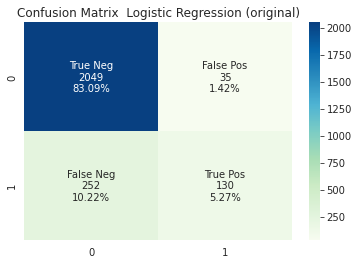

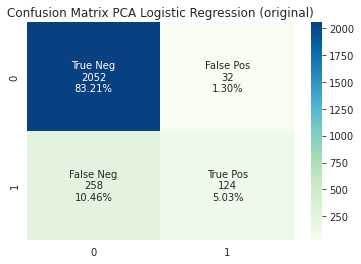

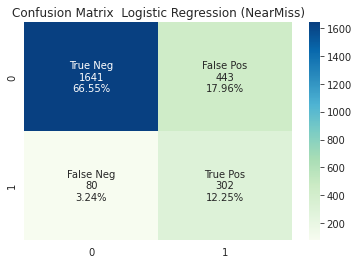

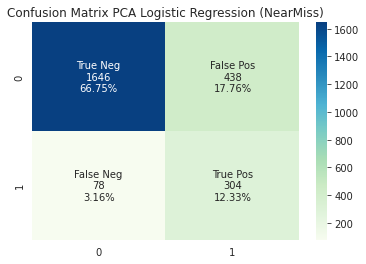

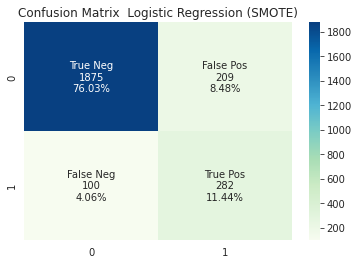

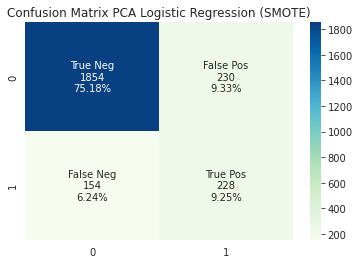

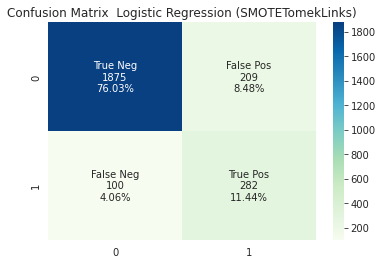

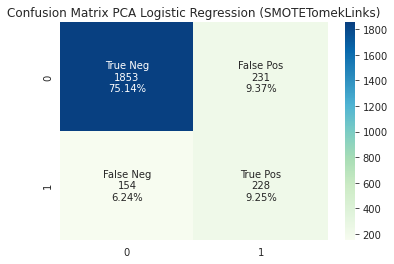

In [278]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu
print('Test dataset samples PCA: ', len(y_test_pca))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('LR', 'original', results)
confusion_matrixes('LR', 'original', results_pca, pca='PCA')

confusion_matrixes('LR', 'undersampling', results)
confusion_matrixes('LR', 'undersampling', results_pca, pca='PCA')

confusion_matrixes('LR', 'oversampling',results)
confusion_matrixes('LR', 'oversampling',results_pca, pca='PCA')

confusion_matrixes('LR', 'both', results)
confusion_matrixes('LR', 'both', results_pca, pca='PCA')

#### 6.1.3 ROC Curves

In [55]:
test_metrics['original']['LR']['auroc'] = auroc ('LR', 'original', results)
test_metrics['undersampling']['LR']['auroc'] = auroc ('LR', 'undersampling', results)
test_metrics['oversampling']['LR']['auroc'] = auroc ('LR', 'oversampling', results)
test_metrics['both']['LR']['auroc'] = auroc ('LR', 'both', results)
print("")
test_metrics_pca['original']['LR']['auroc'] = auroc ('LR', 'original', results_pca, pca = 'PCA')
test_metrics_pca['undersampling']['LR']['auroc'] = auroc ('LR', 'undersampling', results_pca, pca = 'PCA')
test_metrics_pca['oversampling']['LR']['auroc'] = auroc ('LR', 'oversampling', results_pca, pca = 'PCA')
test_metrics_pca['both']['LR']['auroc'] = auroc ('LR', 'both', results_pca, pca = 'PCA')

LR - AUROC  original:  0.6617597552029424
LR - AUROC  NearMiss:  0.789001969631498
LR - AUROC  SMOTE:  0.8189659937092382
LR - AUROC  SMOTETomekLinks:  0.8189659937092382

LR - AUROC PCA original:  0.6546261217352856
LR - AUROC PCA NearMiss:  0.7928193868014591
LR - AUROC PCA SMOTE:  0.7432469777210561
LR - AUROC PCA SMOTETomekLinks:  0.7430070544964879


### WIth PCA

### 6.2 KNN 

### Without PCA

#### 6.2.1 Results

In [56]:
#WITHOUT PCA
#Retrieve best params for each technique used
print("Without PCA")
print('original: ', models['original']['KNN']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['KNN']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['KNN']['bestParamsF1'][-3:])
print('both: ', models['both']['KNN']['bestParamsF1'][-3:])
print("")
#PCA
#Retrieve best params for each technique used
print("With PCA")
print('original: ', models_PCA['original']['KNN']['bestParamsF1'][-3:])
print('undersampling: ', models_PCA['undersampling']['KNN']['bestParamsF1'][-3:])
print('oversampling: ', models_PCA['oversampling']['KNN']['bestParamsF1'][-3:])
print('both: ', models_PCA['both']['KNN']['bestParamsF1'][-3:])

Without PCA
original:  [8, 'uniform', 'manhattan']
undersampling:  [8, 'uniform', 'manhattan']
oversampling:  [2, 'uniform', 'manhattan']
both:  [2, 'uniform', 'manhattan']

With PCA
original:  [8, 'uniform', 'manhattan']
undersampling:  [8, 'uniform', 'manhattan']
oversampling:  [2, 'uniform', 'manhattan']
both:  [2, 'uniform', 'manhattan']


In [57]:
results['original']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results['undersampling']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results['oversampling']['KNN']['params']={'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}
results['both']['KNN']['params'] = {'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}

results_pca['original']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results_pca['undersampling']['KNN']['params']= {'n_neighbors':8, 'weights':'uniform', 'metric':'manhattan'}
results_pca['oversampling']['KNN']['params']={'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}
results_pca['both']['KNN']['params'] = {'n_neighbors':2, 'weights':'uniform', 'metric':'manhattan'}

In [58]:
knn = KNeighborsClassifier()

results['original']['KNN']['predictions'] = knn.set_params(**results['original']['KNN']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['KNN']['predictions'] = knn.set_params(**results['undersampling']['KNN']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['KNN']['predictions'] = knn.set_params(**results['oversampling']['KNN']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['KNN']['predictions'] = knn.set_params(**results['both']['KNN']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

results_pca['original']['KNN']['predictions']= knn.set_params(**results_pca['original']['KNN']['params']).fit(X_train_pca, y_train_pca).predict(X_test_pca)
results_pca['undersampling']['KNN']['predictions'] = knn.set_params(**results_pca['undersampling']['KNN']['params']).fit(X_train_nearmiss_pca, y_train_nearmiss_pca).predict(X_test_pca)
results_pca['oversampling']['KNN']['predictions'] = knn.set_params(**results_pca['oversampling']['KNN']['params']).fit(X_train_smote_pca, y_train_smote_pca).predict(X_test_pca)
results_pca['both']['KNN']['predictions'] = knn.set_params(**results_pca['both']['KNN']['params']).fit(X_train_smote_tomek_pca, y_train_smote_tomek_pca).predict(X_test_pca)

In [59]:
from sklearn.metrics import classification_report
datasets = ['original', 'undersampling', 'oversampling', 'both']
model_name = 'KNN'
met = ['accuracy', 'precision', 'recall', 'f1-score']

for d in datasets:
  for me in met:
      if me == 'accuracy':
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']

      else:
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]

print(classification_report(results['original']['KNN']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['KNN']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['KNN']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['KNN']['predictions'], y_test, output_dict=True))
print("")

print(classification_report(results_pca['original']['KNN']['predictions'], y_test_pca, output_dict=True))
print( classification_report(results_pca['undersampling']['KNN']['predictions'], y_test_pca, output_dict=True))
print( classification_report(results_pca['oversampling']['KNN']['predictions'], y_test_pca, output_dict=True))
print(classification_report(results_pca['both']['KNN']['predictions'], y_test_pca, output_dict=True))

{'0': {'precision': 0.9865642994241842, 'recall': 0.8715557439593048, 'f1-score': 0.9255007877560206, 'support': 2359}, '1': {'precision': 0.20680628272251309, 'recall': 0.7383177570093458, 'f1-score': 0.3231083844580777, 'support': 107}, 'accuracy': 0.8657745336577454, 'macro avg': {'precision': 0.5966852910733487, 'recall': 0.8049367504843252, 'f1-score': 0.6243045861070492, 'support': 2466}, 'weighted avg': {'precision': 0.952730516866569, 'recall': 0.8657745336577454, 'f1-score': 0.899362917864342, 'support': 2466}}
{'0': {'precision': 0.7370441458733206, 'recall': 0.8992974238875878, 'f1-score': 0.8101265822784809, 'support': 1708}, '1': {'precision': 0.5497382198952879, 'recall': 0.2770448548812665, 'f1-score': 0.368421052631579, 'support': 758}, 'accuracy': 0.708029197080292, 'macro avg': {'precision': 0.6433911828843042, 'recall': 0.5881711393844271, 'f1-score': 0.5892738174550299, 'support': 2466}, 'weighted avg': {'precision': 0.6794699804672586, 'recall': 0.708029197080292, 

#### 6.2.1 Confusion Matrix

Test dataset samples:  2466
Test dataset samples PCA:  2466


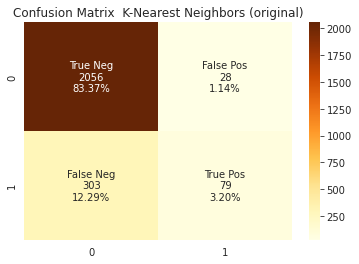

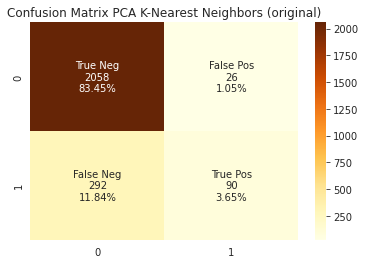

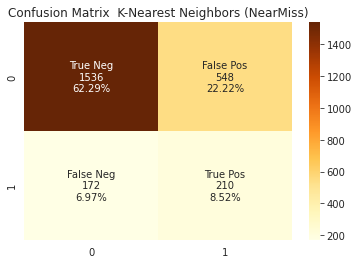

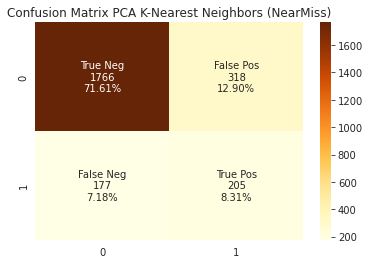

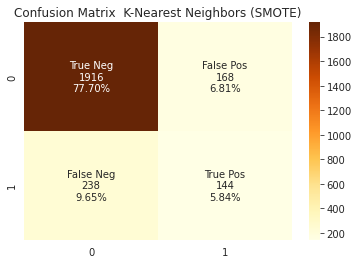

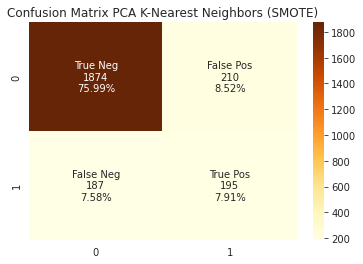

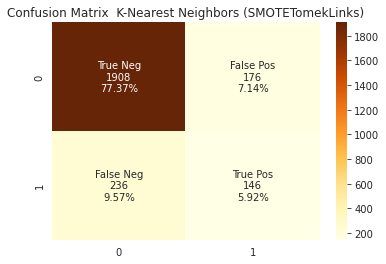

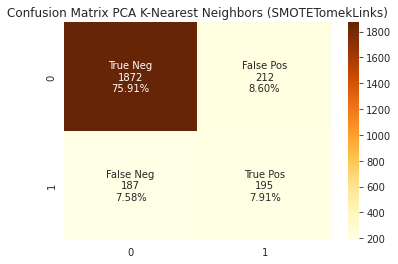

In [60]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu
print('Test dataset samples PCA: ', len(y_test_pca))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('KNN', 'original', results)
confusion_matrixes('KNN', 'original', results_pca, pca='PCA')

confusion_matrixes('KNN', 'undersampling', results)
confusion_matrixes('KNN', 'undersampling', results_pca, pca='PCA')

confusion_matrixes('KNN', 'oversampling',results)
confusion_matrixes('KNN', 'oversampling',results_pca, pca='PCA')

confusion_matrixes('KNN', 'both', results)
confusion_matrixes('KNN', 'both', results_pca, pca='PCA')

#### 6.2.2 AUROC

In [61]:
test_metrics['original']['KNN']['auroc'] = auroc ('KNN', 'original', results)
test_metrics['undersampling']['KNN']['auroc'] = auroc ('KNN', 'undersampling', results)
test_metrics['oversampling']['KNN']['auroc'] = auroc ('KNN', 'oversampling', results)
test_metrics['both']['KNN']['auroc'] = auroc ('KNN', 'both', results)
print("")
test_metrics_pca['original']['KNN']['auroc'] = auroc ('KNN', 'original', results_pca, pca = 'PCA')
test_metrics_pca['undersampling']['KNN']['auroc'] = auroc ('KNN', 'undersampling', results_pca, pca = 'PCA')
test_metrics_pca['oversampling']['KNN']['auroc'] = auroc ('KNN', 'oversampling', results_pca, pca = 'PCA')
test_metrics_pca['both']['KNN']['auroc'] = auroc ('KNN', 'both', results_pca, pca = 'PCA')

KNN - AUROC  original:  0.5966852910733486
KNN - AUROC  NearMiss:  0.6433911828843042
KNN - AUROC  SMOTE:  0.6481745736652229
KNN - AUROC  SMOTETomekLinks:  0.6488729889157983

KNN - AUROC PCA original:  0.6115630432816472
KNN - AUROC PCA NearMiss:  0.6920290219171749
KNN - AUROC PCA SMOTE:  0.7048517249349318
KNN - AUROC PCA SMOTETomekLinks:  0.7043718784857955


### 6.3 SVM

### Without PCA

#### 6.3.1 Results

In [62]:
#WITHOUT PCA
#Retrieve best params for each technique used
print("Without PCA")
print('original: ', models['original']['SVM']['bestParamsF1'][-3:])
print('undersampling: ', models['undersampling']['SVM']['bestParamsF1'][-3:])
print('oversampling: ', models['oversampling']['SVM']['bestParamsF1'][-3:])
print('both: ', models['both']['SVM']['bestParamsF1'][-3:])
print("")
#PCA
#Retrieve best params for each technique used
print("With PCA")
print('original: ', models_PCA['original']['SVM']['bestParamsF1'][-3:])
print('undersampling: ', models_PCA['undersampling']['SVM']['bestParamsF1'][-3:])
print('oversampling: ', models_PCA['oversampling']['SVM']['bestParamsF1'][-3:])
print('both: ', models_PCA['both']['SVM']['bestParamsF1'][-3:])

Without PCA
original:  ['rbf', 'scale', 0.01]
undersampling:  ['poly', 'scale', 0.01]
oversampling:  ['poly', 'scale', 0.01]
both:  ['poly', 'scale', 0.01]

With PCA
original:  ['rbf', 'scale', 0.01]
undersampling:  ['poly', 'scale', 0.01]
oversampling:  ['poly', 'scale', 0.01]
both:  ['poly', 'scale', 0.01]


In [63]:
results['original']['SVM']['params']= {'kernel':'rbf', 'gamma':'scale', 'C':0.01}
results['undersampling']['SVM']['params']= {'kernel':'poly', 'gamma':'scale', 'C':0.01}
results['oversampling']['SVM']['params']={'kernel':'poly', 'gamma':'scale', 'C':0.01}
results['both']['SVM']['params'] = {'kernel':'poly', 'gamma':'scale', 'C':0.01}

results_pca['original']['SVM']['params']= {'kernel':'rbf', 'gamma':'scale', 'C':0.01}
results_pca['undersampling']['SVM']['params']= {'kernel':'poly', 'gamma':'scale', 'C':0.01}
results_pca['oversampling']['SVM']['params']={'kernel':'poly', 'gamma':'scale', 'C':0.01}
results_pca['both']['SVM']['params'] = {'kernel':'poly', 'gamma':'scale', 'C':0.01}

In [64]:
svm = SVC()

results['original']['SVM']['predictions'] = svm.set_params(**results['original']['SVM']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['SVM']['predictions'] = svm.set_params(**results['undersampling']['SVM']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['SVM']['predictions'] = svm.set_params(**results['oversampling']['SVM']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['SVM']['predictions'] = svm.set_params(**results['both']['SVM']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

results_pca['original']['SVM']['predictions']= svm.set_params(**results_pca['original']['SVM']['params']).fit(X_train_pca, y_train_pca).predict(X_test_pca)
results_pca['undersampling']['SVM']['predictions'] = svm.set_params(**results_pca['undersampling']['SVM']['params']).fit(X_train_nearmiss_pca, y_train_nearmiss_pca).predict(X_test_pca)
results_pca['oversampling']['SVM']['predictions'] = svm.set_params(**results_pca['oversampling']['SVM']['params']).fit(X_train_smote_pca, y_train_smote_pca).predict(X_test_pca)
results_pca['both']['SVM']['predictions'] = svm.set_params(**results_pca['both']['SVM']['params']).fit(X_train_smote_tomek_pca, y_train_smote_tomek_pca).predict(X_test_pca)

In [65]:
from sklearn.metrics import classification_report
datasets = ['original', 'undersampling', 'oversampling', 'both']
model_name = 'SVM'
met = ['accuracy', 'precision', 'recall', 'f1-score']

for d in datasets:
  for me in met:
      if me == 'accuracy':
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']

      else:
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]

print(classification_report(results['original']['SVM']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['SVM']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['SVM']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['SVM']['predictions'], y_test, output_dict=True))
print("")

print(classification_report(results_pca['original']['SVM']['predictions'], y_test_pca, output_dict=True))
print( classification_report(results_pca['undersampling']['SVM']['predictions'], y_test_pca, output_dict=True))
print( classification_report(results_pca['oversampling']['SVM']['predictions'], y_test_pca, output_dict=True))
print(classification_report(results_pca['both']['SVM']['predictions'], y_test_pca, output_dict=True))

{'0': {'precision': 1.0, 'recall': 0.8450932684509327, 'f1-score': 0.916043956043956, 'support': 2466}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'accuracy': 0.8450932684509327, 'macro avg': {'precision': 0.5, 'recall': 0.42254663422546634, 'f1-score': 0.458021978021978, 'support': 2466}, 'weighted avg': {'precision': 1.0, 'recall': 0.8450932684509327, 'f1-score': 0.916043956043956, 'support': 2466}}
{'0': {'precision': 0.9452975047984645, 'recall': 0.8790718429272646, 'f1-score': 0.9109826589595377, 'support': 2241}, '1': {'precision': 0.2905759162303665, 'recall': 0.49333333333333335, 'f1-score': 0.3657331136738056, 'support': 225}, 'accuracy': 0.8438767234387672, 'macro avg': {'precision': 0.6179367105144156, 'recall': 0.686202588130299, 'f1-score': 0.6383578863166717, 'support': 2466}, 'weighted avg': {'precision': 0.8855601335787475, 'recall': 0.8438767234387672, 'f1-score': 0.8612336128568249, 'support': 2466}}
{'0': {'precision': 0.935700575815739, '

#### 6.3.2 Confusion Matrix

Test dataset samples:  2466
Test dataset samples PCA:  2466


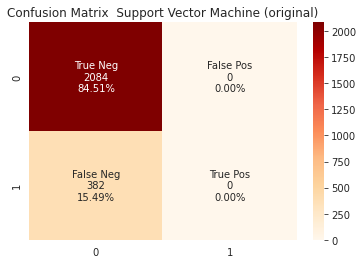

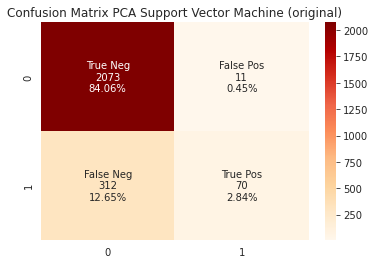

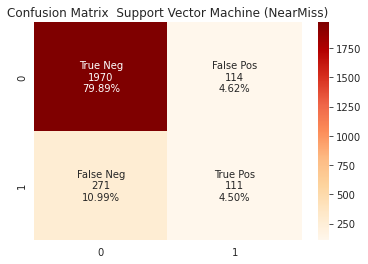

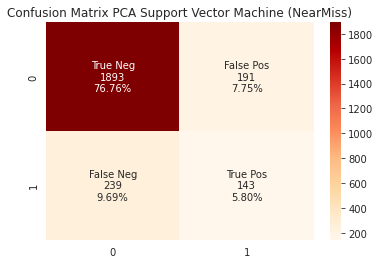

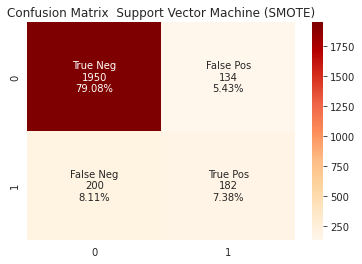

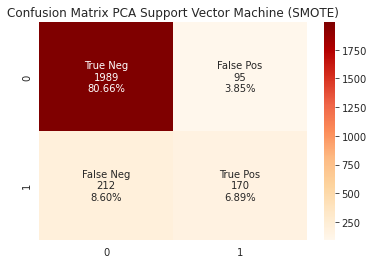

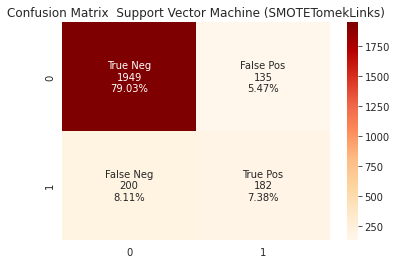

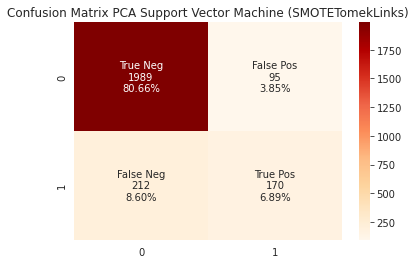

In [66]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu
print('Test dataset samples PCA: ', len(y_test_pca))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('SVM', 'original', results)
confusion_matrixes('SVM', 'original', results_pca, pca='PCA')

confusion_matrixes('SVM', 'undersampling', results)
confusion_matrixes('SVM', 'undersampling', results_pca, pca='PCA')

confusion_matrixes('SVM', 'oversampling',results)
confusion_matrixes('SVM', 'oversampling',results_pca, pca='PCA')

confusion_matrixes('SVM', 'both', results)
confusion_matrixes('SVM', 'both', results_pca, pca='PCA')

#### 6.3.3 AUROC

In [96]:
test_metrics['original']['SVM']['auroc'] = auroc ('SVM', 'original', results)
test_metrics['undersampling']['SVM']['auroc'] = auroc ('SVM', 'undersampling', results)
test_metrics['oversampling']['SVM']['auroc'] = auroc ('SVM', 'oversampling', results)
test_metrics['both']['SVM']['auroc'] =  auroc ('SVM', 'both', results)
print("")
test_metrics['original']['SVM']['auroc'] = auroc ('SVM', 'original', results_pca, pca = 'PCA')
test_metrics['undersampling']['SVM']['auroc'] = auroc ('SVM', 'undersampling', results_pca, pca = 'PCA')
test_metrics['oversampling']['SVM']['auroc'] = auroc ('SVM', 'oversampling', results_pca, pca = 'PCA')
test_metrics['both']['SVM']['auroc'] = auroc ('SVM', 'both', results_pca, pca = 'PCA')

SVM - AUROC  original:  0.5
SVM - AUROC  NearMiss:  0.6179367105144155
SVM - AUROC  SMOTE:  0.7060701831958276
SVM - AUROC  SMOTETomekLinks:  0.7058302599712595

SVM - AUROC PCA original:  0.5889838811789652
SVM - AUROC PCA NearMiss:  0.6413474389765954
SVM - AUROC PCA SMOTE:  0.6997203826712625
SVM - AUROC PCA SMOTETomekLinks:  0.6997203826712625


### 6.4 Random Forest

### Without PCA

#### 6.4.1 Results

In [68]:
#WITHOUT PCA
#Retrieve best params for each technique used
print("Without PCA")
print('original: ', models['original']['RF']['bestParamsF1'][-2:])
print('undersampling: ', models['undersampling']['RF']['bestParamsF1'][-2:])
print('oversampling: ', models['oversampling']['RF']['bestParamsF1'][-2:])
print('both: ', models['both']['RF']['bestParamsF1'][-2:])
print("")
#PCA
#Retrieve best params for each technique used
print("With PCA")
print('original: ', models_PCA['original']['RF']['bestParamsF1'][-2:])
print('undersampling: ', models_PCA['undersampling']['RF']['bestParamsF1'][-2:])
print('oversampling: ', models_PCA['oversampling']['RF']['bestParamsF1'][-2:])
print('both: ', models_PCA['both']['RF']['bestParamsF1'][-2:])

Without PCA
original:  [100, 'log2']
undersampling:  [100, 'sqrt']
oversampling:  [100, 'sqrt']
both:  [1000, 'sqrt']

With PCA
original:  [100, 'sqrt']
undersampling:  [10, 'sqrt']
oversampling:  [1000, 'log2']
both:  [1000, 'log2']


In [69]:
results['original']['RF']['params']= {'n_estimators':100, 'max_features':'log2'}
results['undersampling']['RF']['params']= {'n_estimators':100, 'max_features':'sqrt'}
results['oversampling']['RF']['params']={'n_estimators':100, 'max_features':'sqrt'}
results['both']['RF']['params'] = {'n_estimators':1000, 'max_features':'sqrt'}

results['original']['RF']['params']= {'n_estimators':100, 'max_features':'sqrt'}
results['undersampling']['RF']['params']= {'n_estimators':10, 'max_features':'sqrt'}
results['oversampling']['RF']['params']={'n_estimators':1000, 'max_features':'log2'}
results['both']['RF']['params'] = {'n_estimators':1000, 'max_features':'log2'}


In [70]:
rf = RandomForestClassifier()

results['original']['RF']['predictions'] = rf.set_params(**results['original']['RF']['params']).fit(X_train, y_train).predict(X_test)
results['undersampling']['RF']['predictions'] = rf.set_params(**results['undersampling']['RF']['params']).fit(X_train_nearmiss, y_train_nearmiss).predict(X_test)
results['oversampling']['RF']['predictions'] = rf.set_params(**results['oversampling']['RF']['params']).fit(X_train_smote, y_train_smote).predict(X_test)
results['both']['RF']['predictions'] = rf.set_params(**results['both']['RF']['params']).fit(X_train_smote_tomek, y_train_smote_tomek).predict(X_test)

results_pca['original']['RF']['predictions']= rf.set_params(**results_pca['original']['RF']['params']).fit(X_train_pca, y_train_pca).predict(X_test_pca)
results_pca['undersampling']['RF']['predictions'] = rf.set_params(**results_pca['undersampling']['RF']['params']).fit(X_train_nearmiss_pca, y_train_nearmiss_pca).predict(X_test_pca)
results_pca['oversampling']['RF']['predictions'] = rf.set_params(**results_pca['oversampling']['RF']['params']).fit(X_train_smote_pca, y_train_smote_pca).predict(X_test_pca)
results_pca['both']['RF']['predictions'] = rf.set_params(**results_pca['both']['RF']['params']).fit(X_train_smote_tomek_pca, y_train_smote_tomek_pca).predict(X_test_pca)

In [71]:
from sklearn.metrics import classification_report
datasets = ['original', 'undersampling', 'oversampling', 'both']
model_name = 'RF'
met = ['accuracy', 'precision', 'recall', 'f1-score']

for d in datasets:
  for me in met:
      if me == 'accuracy':
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['accuracy']

      else:
        test_metrics[d][model_name][me] = classification_report(results[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]
        test_metrics_pca[d][model_name][me] = classification_report(results_pca[d][model_name]['predictions'], y_test, output_dict=True)['weighted avg'][me]

print(classification_report(results['original']['RF']['predictions'], y_test, output_dict=True))
print( classification_report(results['undersampling']['RF']['predictions'], y_test, output_dict=True))
print( classification_report(results['oversampling']['RF']['predictions'], y_test, output_dict=True))
print(classification_report(results['both']['RF']['predictions'], y_test, output_dict=True))
print("")

print(classification_report(results_pca['original']['RF']['predictions'], y_test_pca, output_dict=True))
print( classification_report(results_pca['undersampling']['RF']['predictions'], y_test_pca, output_dict=True))
print( classification_report(results_pca['oversampling']['RF']['predictions'], y_test_pca, output_dict=True))
print(classification_report(results_pca['both']['RF']['predictions'], y_test_pca, output_dict=True))

{'0': {'precision': 0.9788867562380038, 'recall': 0.8990744821507272, 'f1-score': 0.9372846312887663, 'support': 2269}, '1': {'precision': 0.4005235602094241, 'recall': 0.7766497461928934, 'f1-score': 0.5284974093264249, 'support': 197}, 'accuracy': 0.889294403892944, 'macro avg': {'precision': 0.6897051582237139, 'recall': 0.8378621141718103, 'f1-score': 0.7328910203075956, 'support': 2466}, 'weighted avg': {'precision': 0.9326833703427767, 'recall': 0.889294403892944, 'f1-score': 0.904628068950331, 'support': 2466}}
{'0': {'precision': 0.4822456813819578, 'recall': 0.9357541899441341, 'f1-score': 0.636478784040532, 'support': 1074}, '1': {'precision': 0.819371727748691, 'recall': 0.22485632183908047, 'f1-score': 0.3528748590755355, 'support': 1392}, 'accuracy': 0.5344687753446877, 'macro avg': {'precision': 0.6508087045653244, 'recall': 0.5803052558916073, 'f1-score': 0.4946768215580338, 'support': 2466}, 'weighted avg': {'precision': 0.6725455421047853, 'recall': 0.5344687753446877,

#### 6.4.2 Confusion Matrix

Test dataset samples:  2466
Test dataset samples PCA:  2466


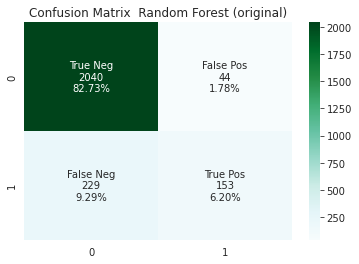

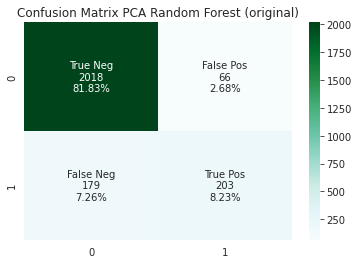

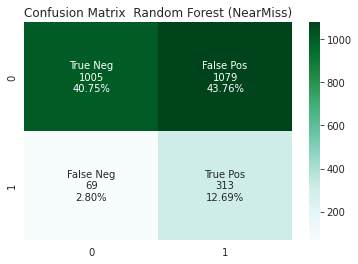

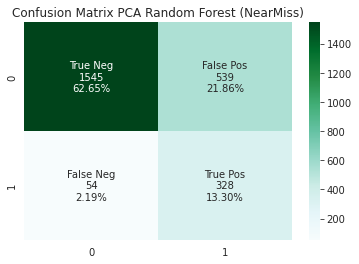

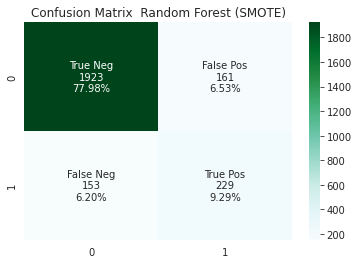

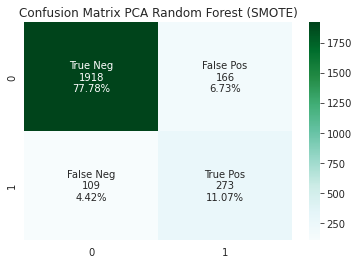

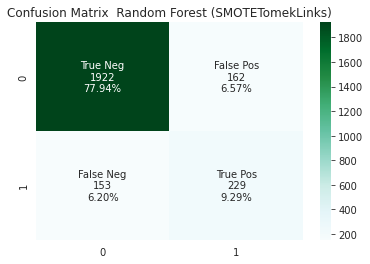

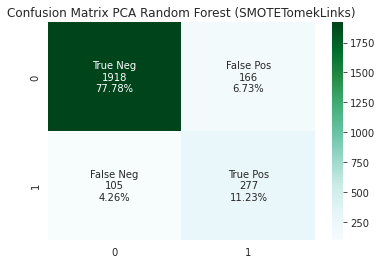

In [72]:
print('Test dataset samples: ', len(y_test))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu
print('Test dataset samples PCA: ', len(y_test_pca))#vmin=-1, vmax=1,center=0, fmt='.2g',cmap='GnBu

confusion_matrixes('RF', 'original', results)
confusion_matrixes('RF', 'original', results_pca, pca='PCA')

confusion_matrixes('RF', 'undersampling', results)
confusion_matrixes('RF', 'undersampling', results_pca, pca='PCA')

confusion_matrixes('RF', 'oversampling',results)
confusion_matrixes('RF', 'oversampling',results_pca, pca='PCA')

confusion_matrixes('RF', 'both', results)
confusion_matrixes('RF', 'both', results_pca, pca='PCA')

#### 6.4.3 AUROC

In [95]:
test_metrics['original']['RF']['auroc'] = auroc ('RF', 'original', results)
test_metrics['undersampling']['RF']['auroc'] = auroc ('RF', 'undersampling', results)
test_metrics['oversampling']['RF']['auroc'] = auroc ('RF', 'oversampling', results)
test_metrics['both']['RF']['auroc'] = auroc ('RF', 'both', results)
print("")
test_metrics_pca['original']['RF']['auroc'] = auroc ('RF', 'original', results_pca, pca = 'PCA')
test_metrics_pca['undersampling']['RF']['auroc'] = auroc ('RF', 'undersampling', results_pca, pca = 'PCA')
test_metrics_pca['oversampling']['RF']['auroc'] = auroc ('RF', 'oversampling', results_pca, pca = 'PCA')
test_metrics_pca['both']['RF']['auroc'] = auroc ('RF', 'both', results_pca, pca = 'PCA')

RF - AUROC  original:  0.6897051582237139
RF - AUROC  NearMiss:  0.6508087045653244
RF - AUROC  SMOTE:  0.7611105807398177
RF - AUROC  SMOTETomekLinks:  0.7608706575152496

RF - AUROC PCA original:  0.7498718734612254
RF - AUROC PCA NearMiss:  0.8000007536855223
RF - AUROC PCA SMOTE:  0.8175025876536263
RF - AUROC PCA SMOTETomekLinks:  0.822738189747867


## 7 Tables and Plots

###7.1 Tables

In [118]:
def show_table_metrics (test_metrics, dataset, pca=''):
  test_metrics_df = pd.DataFrame.from_dict(test_metrics[dataset])
  print(f"Test metrics {dataset} {pca}")
  return test_metrics_df.T.sort_values(by='f1-score', ascending=False)

#### Original

In [321]:
test_metrics_original = show_table_metrics (test_metrics, 'original', pca='')
test_metrics_original

Test metrics original 


,accuracy,precision,recall,f1-score,auroc
SVM,0.845093,1.000000,0.845093,0.916044,0.588984
RF,0.889294,0.932683,0.889294,0.904628,0.689705
LR,0.883617,0.940190,0.883617,0.903823,0.661760
KNN,0.865775,0.952731,0.865775,0.899363,0.596685


In [322]:
test_metrics_original_pca = show_table_metrics (test_metrics_pca, 'original', pca='PCA')
test_metrics_original_pca

Test metrics original PCA


,accuracy,precision,recall,f1-score,auroc
RF,0.900649,0.920670,0.900649,0.907960,0.749872
SVM,0.869019,0.968067,0.869019,0.907184,0.749872
LR,0.882401,0.942891,0.882401,0.904077,0.654626
KNN,0.871046,0.952154,0.871046,0.901618,0.611563


#### Undersampling

In [323]:
test_metrics_undersampling = show_table_metrics (test_metrics, 'undersampling', pca='')
test_metrics_undersampling

Test metrics undersampling 


,accuracy,precision,recall,f1-score,auroc
SVM,0.843877,0.885560,0.843877,0.861234,0.641347
LR,0.787916,0.788379,0.787916,0.763877,0.789002
KNN,0.708029,0.679470,0.708029,0.674355,0.643391
RF,0.534469,0.672546,0.534469,0.476391,0.650809


In [324]:
test_metrics_undersampling_pca = show_table_metrics (test_metrics_pca, 'undersampling', pca='PCA')
test_metrics_undersampling_pca

Test metrics undersampling PCA


,accuracy,precision,recall,f1-score,auroc
SVM,0.825629,0.836023,0.825629,0.830481,0.800001
KNN,0.799270,0.781502,0.799270,0.787147,0.692029
LR,0.790754,0.791628,0.790754,0.767136,0.792819
RF,0.759530,0.782595,0.759530,0.728674,0.800001


#### Oversampling

In [325]:
test_metrics_oversampling = show_table_metrics (test_metrics, 'oversampling', pca='')
test_metrics_oversampling

Test metrics oversampling 


,accuracy,precision,recall,f1-score,auroc
RF,0.872668,0.871620,0.872668,0.872131,0.761111
SVM,0.864558,0.876850,0.864558,0.869906,0.699720
LR,0.874696,0.867558,0.874696,0.868556,0.818966
KNN,0.835361,0.850758,0.835361,0.842304,0.648175


In [326]:
test_metrics_oversampling_pca = show_table_metrics (test_metrics_pca, 'oversampling', pca='PCA')
test_metrics_oversampling_pca

Test metrics oversampling PCA


,accuracy,precision,recall,f1-score,auroc
RF,0.888483,0.883729,0.888483,0.885385,0.817503
SVM,0.875507,0.899675,0.875507,0.885064,0.817503
LR,0.844282,0.835259,0.844282,0.838684,0.743247
KNN,0.839011,0.835385,0.839011,0.837105,0.704852


#### Both

In [327]:
test_metrics_both = show_table_metrics (test_metrics, 'both', pca='')
test_metrics_both

Test metrics both 


,accuracy,precision,recall,f1-score,auroc
RF,0.872263,0.871085,0.872263,0.871657,0.760871
SVM,0.864152,0.876245,0.864152,0.869426,0.699720
LR,0.874696,0.867558,0.874696,0.868556,0.818966
KNN,0.832928,0.845905,0.832928,0.838862,0.648873


In [328]:
test_metrics_both_pca = show_table_metrics (test_metrics_pca, 'both', pca='PCA')
test_metrics_both_pca

Test metrics both PCA


,accuracy,precision,recall,f1-score,auroc
RF,0.890105,0.885277,0.890105,0.886859,0.822738
SVM,0.875507,0.899675,0.875507,0.885064,0.822738
LR,0.843877,0.834750,0.843877,0.838199,0.743007
KNN,0.838200,0.834268,0.838200,0.836124,0.704372


### 7.2 Plots

In [338]:
def plot_barchart_metrics (df, dataset, pca=''):
  
  #the dataframe has as index the model name, in order to plot it seaborn must 
  #receive a dataframe with numerical indices, so we reset the index and call
  #the old index column as 'Model'
  df = df.reset_index().rename(columns={'index':'Model'})
  
  #to properly plot the barchart we need to transform our dataset in the following
  #way:
  #
  # columns:  Models (LR, KNN, SVM, RF), Metric (accuracy, precision, ...) and
  #           Value (value of the corresponding metric)
  df_new = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Value') #I need to transofrm my df to properly plot the barchart

  #chose coherent colors (blue for LR, orange for KNN, red for SVM and green for RF)
  colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']
  
  #factorplot is better since put the legend outside the graph while barplot put
  #it inside over the bars
  sns.factorplot(data=df_new,  x = 'Metric', y = 'Value', hue='Model', kind='bar', palette = colors)
  plt.title(f"Metrics {dataset} {pca}")


#### Original

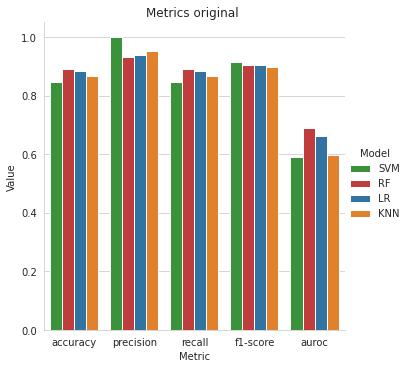

In [339]:
plot_barchart_metrics(test_metrics_original, 'original')

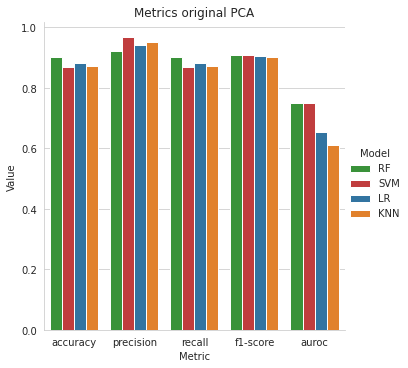

In [340]:
plot_barchart_metrics(test_metrics_original_pca, 'original', pca='PCA')

#### Undersampling

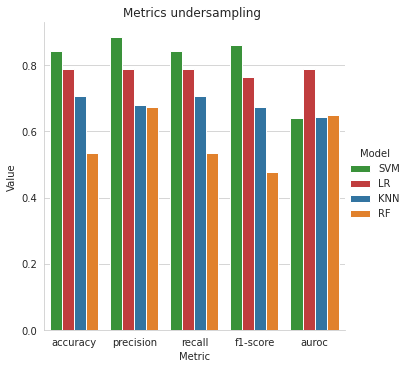

In [341]:
plot_barchart_metrics(test_metrics_undersampling, 'undersampling')

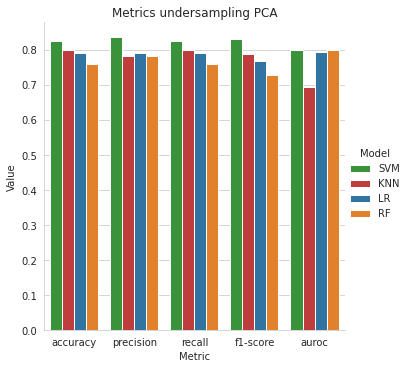

In [342]:
plot_barchart_metrics(test_metrics_undersampling_pca, 'undersampling', pca='PCA')

#### Oversampling

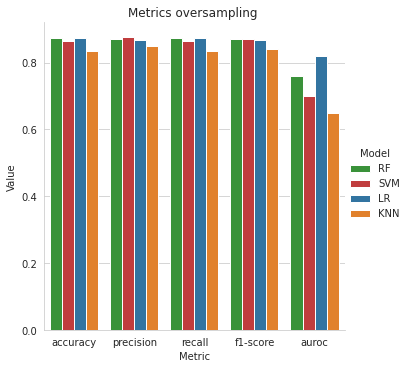

In [343]:
plot_barchart_metrics(test_metrics_oversampling, 'oversampling')

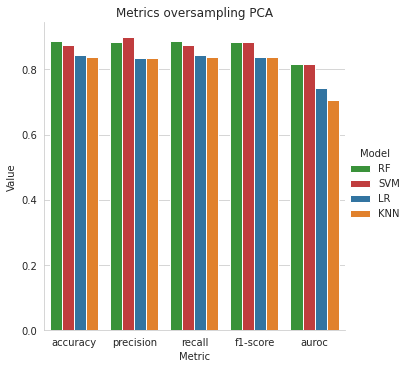

In [344]:
plot_barchart_metrics(test_metrics_oversampling_pca, 'oversampling', pca='PCA')

#### Both

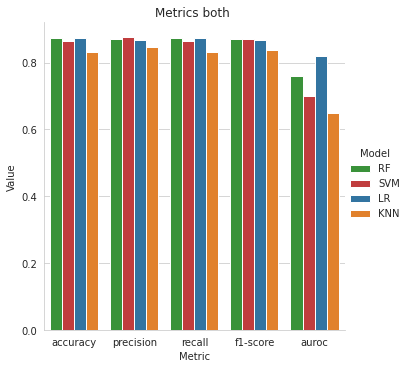

In [345]:
plot_barchart_metrics(test_metrics_both, 'both')

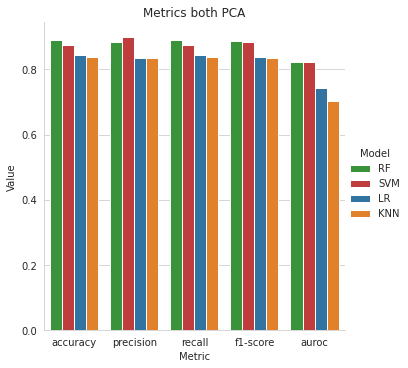

In [346]:
plot_barchart_metrics(test_metrics_both_pca, 'both', pca='PCA')

In [246]:
#print(test_metrics_both_pca['accuracy'])
#sns.barplot( data=test_metrics_both_pca)
bins = 4
print(test_metrics_both_pca.columns)
test_metrics_both_pca = pd.melt(test_metrics_both_pca, id_vars='Model', var_name='Metric', value_name='Value')
test_metrics_both_pca

Index(['Model', 'accuracy', 'precision', 'recall', 'f1-score', 'auroc'], dtype='object')


,Model,Metric,Value
0,RF,accuracy,0.890105
1,SVM,accuracy,0.875507
2,LR,accuracy,0.843877
3,KNN,accuracy,0.838200
4,RF,precision,0.885277
5,SVM,precision,0.899675
6,LR,precision,0.834750
7,KNN,precision,0.834268
8,RF,recall,0.890105
9,SVM,recall,0.875507


<class 'str'>


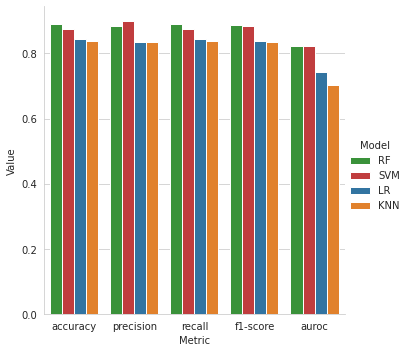

In [318]:
print(type(test_metrics_both_pca['Model'][0]))

colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']
sns.factorplot(data=test_metrics_both_pca,  x = 'Metric', y = 'Value', hue='Model', kind='bar', palette = colors)
# #sns.barplot(data=test_metrics_both_pca, x = feature, hue='Revenue', multiple='stack', bins=n_bins,discrete=True, palette='Paired')


In [135]:
metrics_list = ['accuracy', 'precision', 'recall',	'f1-score',	'auroc']
sns.barplot(x=metrics_list, y = test_metrics_both_pca.index data=test_metrics_both_pca)

ValueError: ignored

In [111]:
test_metrics_original_pca = pd.DataFrame.from_dict(test_metrics_pca['original'])
print("Test metrics original PCA")
test_metrics_original_pca.T.sort_values(by='f1-score', ascending=False)

Test metrics original PCA


,accuracy,precision,recall,f1-score,auroc
RF,0.900649,0.920670,0.900649,0.907960,0.749872
SVM,0.869019,0.968067,0.869019,0.907184,0.749872
LR,0.882401,0.942891,0.882401,0.904077,0.654626
KNN,0.871046,0.952154,0.871046,0.901618,0.611563


In [112]:
test_metrics_undersampling = pd.DataFrame.from_dict(test_metrics['undersampling'])
print("Test metrics undersampling")
test_metrics_undersampling.T.sort_values(by='f1-score', ascending=False)

Test metrics undersampling


,accuracy,precision,recall,f1-score,auroc
SVM,0.843877,0.885560,0.843877,0.861234,0.641347
LR,0.787916,0.788379,0.787916,0.763877,0.789002
KNN,0.708029,0.679470,0.708029,0.674355,0.643391
RF,0.534469,0.672546,0.534469,0.476391,0.650809


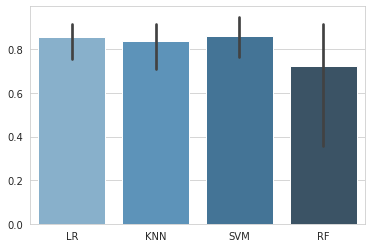

In [90]:
ax = sns.barplot(  data=test_metrics_original,
                 palette="Blues_d")

In [78]:
metrics['original']['LR']

TypeError: ignored

In [ ]:
def plot_metrics(metrics, dataset, model_name):
    sns.set_context('talk')
    
    fig, ax = plt.subplots(figsize=(12, 8))


    x = np.arange(len(['Accuracy', 'Precision', 'Sensitivity', 'F1 Score'])) 
    
    # Define bar width. We need this to offset the second bar.
    bar_width = 0.19

    b1 = ax.bar(x, LR,
                width=bar_width, label='LR')
    
    
    # Same thing, but offset the x.
    b2 = ax.bar(x + bar_width,KNN,
                width=bar_width, label='KNN')
    b3 = ax.bar(x + 2*bar_width,SVM,
                width=bar_width, label='SVM')
    b4 = ax.bar(x + 3*bar_width, RF,
                width=bar_width, label='RF')
    
    

    # Fix the x-axes.
    ax.set_xticks(x + 3*bar_width / 2)
    ax.set_xticklabels(['Accuracy', 'Precision', 'Sensitivity', 'F1 score'])

    # Add legend.
    ax.legend(loc = 'lower right')

    # Axis styling.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    # Add axis and chart labels.
    ax.set_xlabel('Metrics', labelpad=15)
    ax.set_title(f'Metrics comparison for {name} dataset', pad=15)

    # You can just append this to the code above.

    # For each bar in the chart, add a text label.
    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        text = f'{bar_value:,}'
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        text_y = bar.get_y() + bar_value
        # If we want the text to be the same color as the bar, we can
        # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=12)
    
    fig.savefig(f'{name}.png')

    fig.tight_layout()

In [ ]:
#%% MODELS

from sklearn.model_selection import (
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
)

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

In [ ]:
#%%
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
# define model
lr = LogisticRegression(random_state=seed, class_weight=None)
accuracies=[]
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10, dataset=''):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        
        
        # print(f'Accuracy Score: {accuracy_score(y.iloc[tt],y_pred)}')
        # accuracies.append(accuracy_score(y.iloc[tt],y_pred))
        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )


    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 1.2, -0.2],
        xlim=[0, X.shape[0]],
    )
    ax.set_title("{}".format(type(cv).__name__)+f' ({dataset})', fontsize=15)
    return ax


fig, ax = plt.subplots()
n_splits=10
cv = StratifiedKFold(n_splits, shuffle=False)
X_train_smote, y_train_smote = shuffle(X_train_smote, y_train_smote)
plot_cv_indices(cv, X_train, y_train, y_train, ax, n_splits, dataset='original')


In [ ]:
feat_imp = pd.Series(RFgrid_search.best_estimator_.feature_importances_, list(X_train_smote)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()